In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score
import matplotlib.colors as colors
from scripts.conversion import *
import pandas as pd
from sklearn.metrics import average_precision_score, precision_recall_curve
import energyflow as ef
from scipy.stats import chi2


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [73]:
def data_mini_batch_splitter(_data, batch_size,seed=0):
    """
    Split data into mini batches of size batch_size, after shuffling
    """
    data = _data.copy()
    np.random.seed(seed)
    np.random.shuffle(data)
   # print(data[0:10])
    n_batches = int(np.ceil(len(data)/batch_size))
    batches = []
    for i in range(n_batches):
        batches.append(data[i*batch_size:(i+1)*batch_size])
    return batches

def disco_mini_batch(vector1, vector2, batch_size,seed=0):
    """
    Calculate the distance correlation between two vectors split into mini batches
    """
    vector1_mini_batches = data_mini_batch_splitter(vector1, batch_size,seed=seed)
    vector2_mini_batches = data_mini_batch_splitter(vector2, batch_size,seed=seed)

    dcor_list = []
    for i in range(len(vector1_mini_batches)):
        dcor_list.append(dcor.u_distance_correlation_sqr(vector1_mini_batches[i], vector2_mini_batches[i]))

    return np.mean(dcor_list), np.std(dcor_list)

In [3]:
cd ..

/home/rd804/discriminator-metric


In [36]:
print(weight)

[1.0049213 1.0094113 1.0119873 ... 1.0246804 1.0088769 1.0100886]


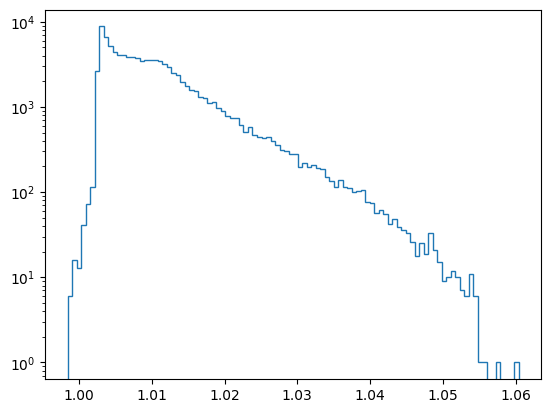

In [38]:
plt.hist(weight, bins=100,histtype='step', label='weight')
plt.yscale('log')
#plt.xlim(0, 0.1)
plt.show()

In [69]:
# percentile cuts of weight

percentiles = [0.5,1,5,10,20,30,40,50,60,70,80,90,95,99,99.5]

label = pd.read_hdf('data/jetnet30_data.h5', f'labels__truth_valid')['labels'].values

disco_less = []
disco_more = []

for percentile in percentiles:
    cut = np.percentile(weight, percentile)
   # plt.hist(weight[label==0], bins=100,histtype='step', label='weight', density=True)
   # plt.hist(weight[label==1], bins=100,histtype='step', label='weight', density=True)

    weight_less_cut = weight[weight<cut]
    weight_more_cut = weight[weight>cut]
    label_less_cut = label[weight<cut]
    label_more_cut = label[weight>cut]
    print(f'percentile: {percentile}')

    disco_less_cut,_  = disco_mini_batch(weight_less_cut, label_less_cut,batch_size=2048)
    disco_more_cut,_  = disco_mini_batch(weight_more_cut, label_more_cut,batch_size=2048)

    disco_less.append(disco_less_cut)
    disco_more.append(disco_more_cut)

    

percentile: 0.5


/home/rd804/.conda/envs/discr-metric/lib/python3.8/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float32, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


percentile: 1
percentile: 5
percentile: 10
percentile: 20
percentile: 30
percentile: 40
percentile: 50
percentile: 60
percentile: 70
percentile: 80
percentile: 90
percentile: 95
percentile: 99
percentile: 99.5


In [93]:
# percentile cuts of weight

trial = 1
distortion = 'truth'
epoch = 4
score_val = np.load(f'output/trial_{trial}_pn_{distortion}/best_model_val_auc.npy')[:,0]
weight = score_val/(1-score_val)

percentiles = [0.5,1,5,10,20,30,40,50,60,70,80,90,95,99,99.5]

label = pd.read_hdf('data/jetnet30_data.h5', f'labels__truth_valid')['labels'].values

disco_less = []
disco_more = []

disco_less_std = []
disco_more_std = []

for percentile in percentiles:
    cut = np.percentile(weight, percentile)
   # plt.hist(weight[label==0], bins=100,histtype='step', label='weight', density=True)
   # plt.hist(weight[label==1], bins=100,histtype='step', label='weight', density=True)

    weight_less_cut = weight[weight<cut]
    weight_more_cut = weight[weight>cut]
    label_less_cut = label[weight<cut]
    label_more_cut = label[weight>cut]
    print(f'percentile: {percentile}')

    disco_less_cut,disco_less_cut_std  = disco_mini_batch(weight_less_cut, label_less_cut,batch_size=2048)
    disco_more_cut, disco_more_cut_std  = disco_mini_batch(weight_more_cut, label_more_cut,batch_size=2048)

    disco_less.append(disco_less_cut)
    disco_more.append(disco_more_cut)

    disco_less_std.append(disco_less_cut_std)
    disco_more_std.append(disco_more_cut_std)

    

percentile: 0.5
percentile: 1
percentile: 5
percentile: 10
percentile: 20
percentile: 30
percentile: 40
percentile: 50
percentile: 60
percentile: 70
percentile: 80
percentile: 90
percentile: 95
percentile: 99
percentile: 99.5


In [97]:
# percentile cuts of weight

trial = 1
distortion = 'truth'
epoch = 4
score_val = np.load(f'output/trial_{trial}_pn_{distortion}/best_model_val_auc.npy')[:,0]
weight = score_val/(1-score_val)

percentiles = [0.5,1,5,10,20,30,40,50,60,70,80,90,95,99,99.5]

label = pd.read_hdf('data/jetnet30_data.h5', f'labels__truth_valid')['labels'].values

disco_less = []
disco_more = []

disco_less_std = []
disco_more_std = []

for percentile in percentiles:
    cut = np.percentile(weight, percentile)

    weight_0 = weight[label==0]
    weight_1 = weight[label==1]
    weight_0_less_cut = weight_0[weight_0<cut]
    weight_0_more_cut = weight_0[weight_0>cut]
    weight_1_less_cut = weight_1[weight_1<cut]
    weight_1_more_cut = weight_1[weight_1>cut]

    print(f'percentile: {percentile}')

    disco_less_cut,disco_less_cut_std  = disco_mini_batch(weight_0_less_cut, weight_1_less_cut,batch_size=2048)
    disco_more_cut, disco_more_cut_std  = disco_mini_batch(weight_0_more_cut, weight_1_more_cut,batch_size=2048)

    disco_less.append(disco_less_cut)
    disco_more.append(disco_more_cut)

    disco_less_std.append(disco_less_cut_std)
    disco_more_std.append(disco_more_cut_std)

    

percentile: 0.5


/home/rd804/.conda/envs/discr-metric/lib/python3.8/site-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float32, 1d, C), array(float32, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


AssertionError: 

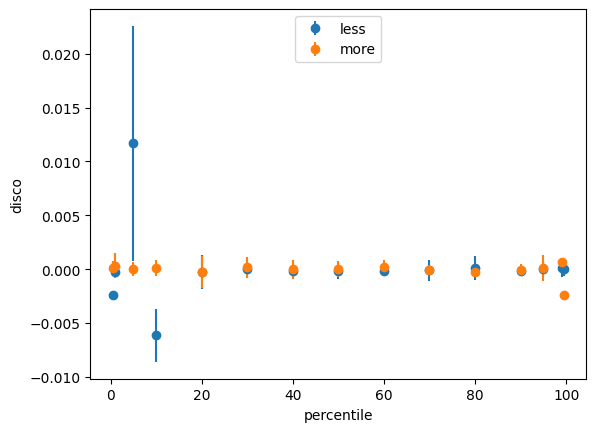

In [94]:
# plot disco vs percentile with disco_std as error bars

plt.errorbar(percentiles, disco_less, yerr=disco_less_std, label='less', fmt='o')
plt.errorbar(percentiles, disco_more, yerr=disco_more_std, label='more', fmt='o')
plt.xlabel('percentile')
plt.ylabel('disco')
plt.legend(loc='upper center')
plt.show()


In [52]:
import dcor

In [95]:
# percentile cuts of weight

trial = 3
distortion = 'tailcut'
score_val = np.load(f'output/test_{trial}_cartesian_particlenet/best_model_val_auc.npy')[:,0]
weight = score_val/(1-score_val)

percentiles = [0.5,1,5,10,20,30,40,50,60,70,80,90,95,99,99.5]

label = pd.read_hdf('data/jetnet30_data.h5', f'labels__tailcut_valid')['labels'].values

disco_less = []
disco_more = []

disco_less_std = []
disco_more_std = []

for percentile in percentiles:
    cut = np.percentile(weight, percentile)
   # plt.hist(weight[label==0], bins=100,histtype='step', label='weight', density=True)
   # plt.hist(weight[label==1], bins=100,histtype='step', label='weight', density=True)

    weight_less_cut = weight[weight<cut]
    weight_more_cut = weight[weight>cut]
    label_less_cut = label[weight<cut]
    label_more_cut = label[weight>cut]
    print(f'percentile: {percentile}')

    disco_less_cut, disco_less_cut_std  = disco_mini_batch(weight_less_cut, label_less_cut,batch_size=2048)
    disco_more_cut, disco_more_cut_std = disco_mini_batch(weight_more_cut, label_more_cut,batch_size=2048)

    disco_less.append(disco_less_cut)
    disco_more.append(disco_more_cut)

    disco_less_std.append(disco_less_cut_std)
    disco_more_std.append(disco_more_cut_std)

    

    


percentile: 0.5
percentile: 1
percentile: 5
percentile: 10
percentile: 20
percentile: 30
percentile: 40
percentile: 50
percentile: 60
percentile: 70
percentile: 80
percentile: 90
percentile: 95
percentile: 99
percentile: 99.5


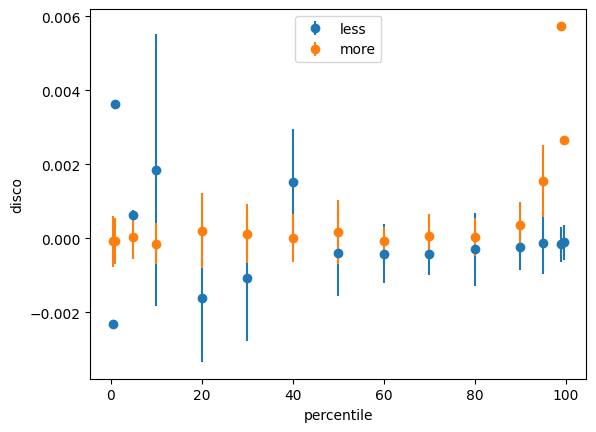

In [96]:
# plot disco vs percentile with disco_std as error bars

plt.errorbar(percentiles, disco_less, yerr=disco_less_std, label='less', fmt='o')
plt.errorbar(percentiles, disco_more, yerr=disco_more_std, label='more', fmt='o')
plt.xlabel('percentile')
plt.ylabel('disco')
plt.legend(loc='upper center')
plt.show()


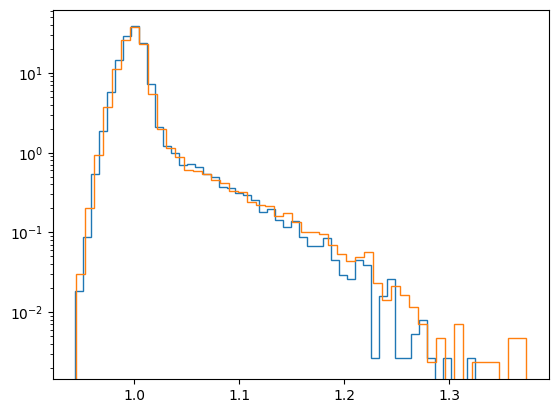

In [5]:
plt.hist(weight[label==0], bins=50,histtype='step', label='weight', density=True)
plt.hist(weight[label==1], bins=50,histtype='step', label='weight', density=True)
plt.yscale('log')
plt.show()

In [36]:
max(mjj)

0.21118754

In [130]:
trial = 4
distortion = 'tailcut'
score_val = np.load(f'output/trial_{trial}_pn_lite_{distortion}/best_model_val_loss.npy')[:,0]
weight = score_val/(1-score_val)

jets = pd.read_hdf('data/jetnet30_data.h5', f'particle_data_{distortion}_valid').values.reshape(-1,30,4)
label = pd.read_hdf('data/jetnet30_data.h5', f'labels__{distortion}_valid')['labels'].values
mjj = mjj_jets(jets)





quantile: 0.01
100368.98659312725


/tmp/ipykernel_1719190/3759217664.py:55: RuntimeWarning: invalid value encountered in divide
  chi2_0_1_l_hist = (hist_0_lower - hist_1_lower)**2/ \
/tmp/ipykernel_1719190/3759217664.py:57: RuntimeWarning: divide by zero encountered in divide
  chi2_0_1_u_hist = (hist_0_upper - hist_1_upper)**2/ \
/tmp/ipykernel_1719190/3759217664.py:57: RuntimeWarning: invalid value encountered in divide
  chi2_0_1_u_hist = (hist_0_upper - hist_1_upper)**2/ \


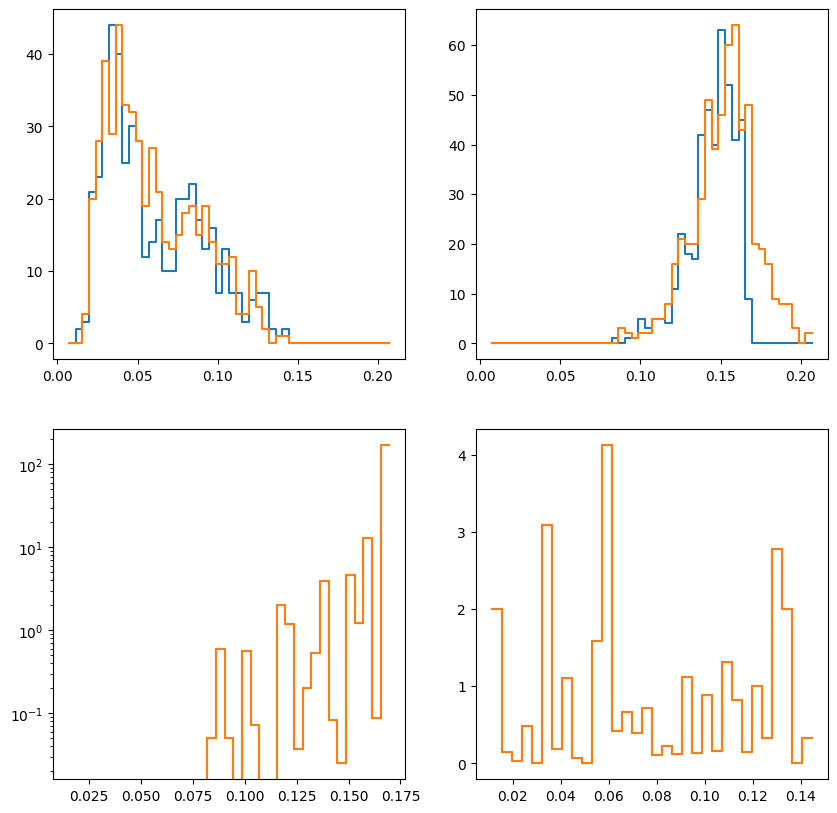

quantile: 0.012742749857031334
100368.98659312725


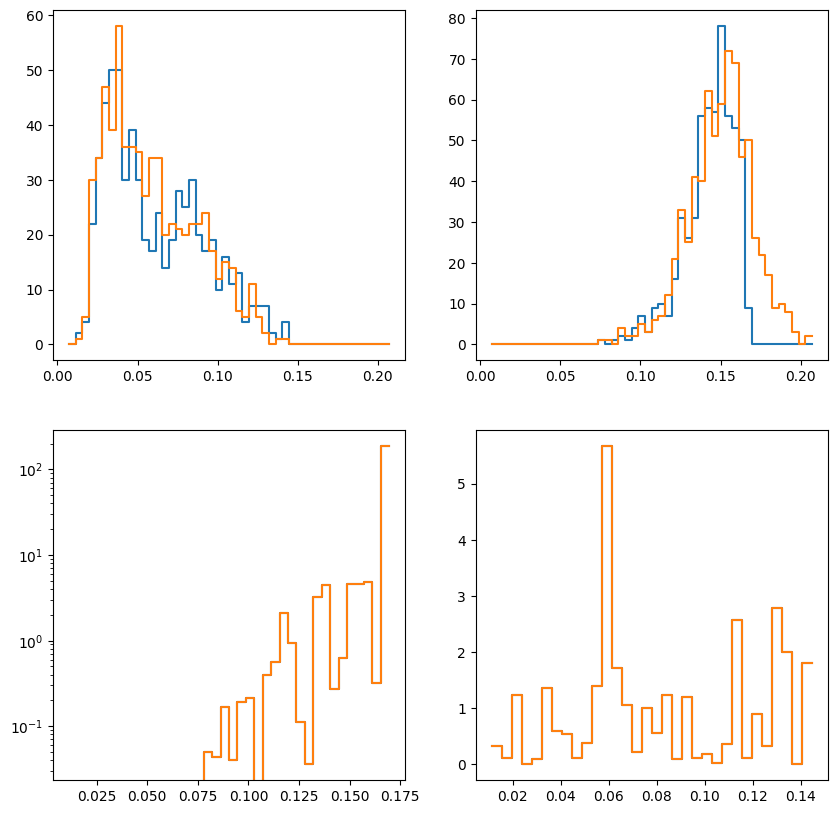

quantile: 0.016237767391887217
100368.98659312725


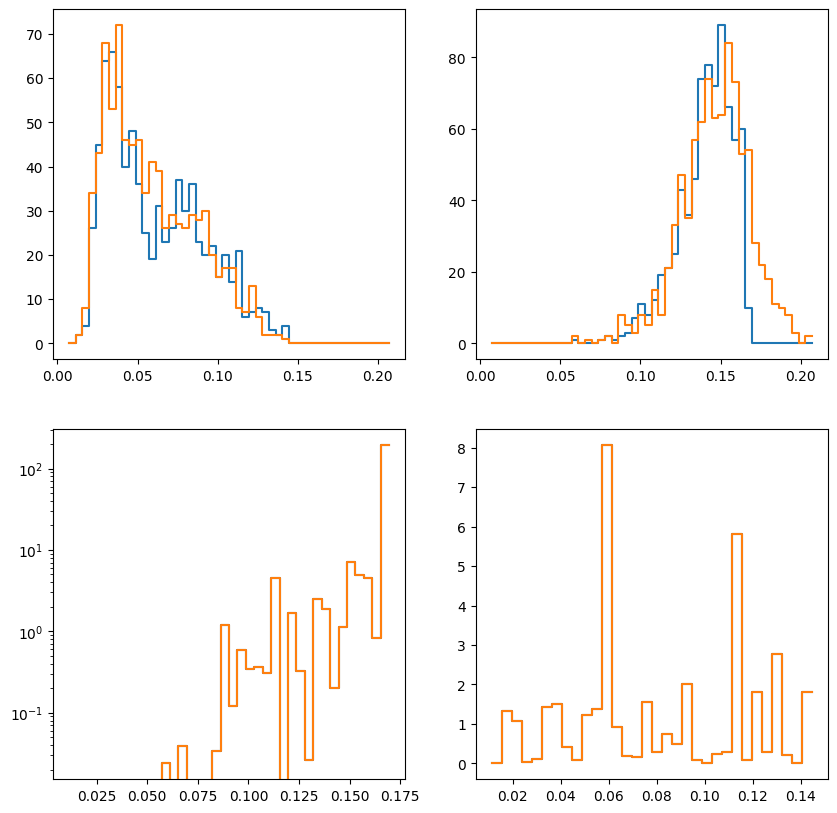

quantile: 0.0206913808111479
100368.98659312725


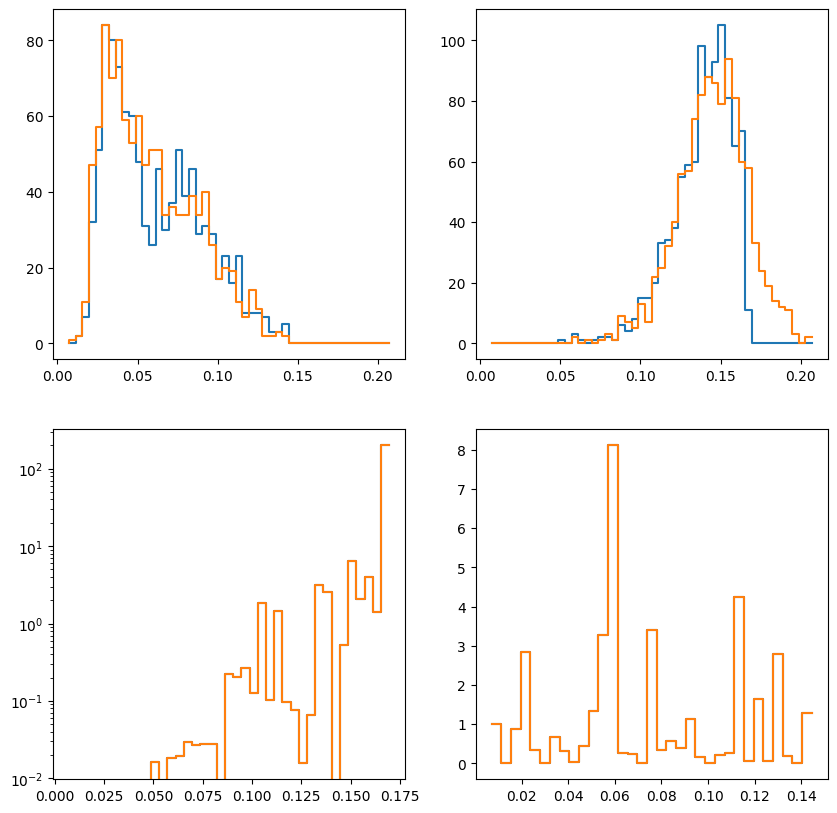

quantile: 0.026366508987303583
100368.98659312725


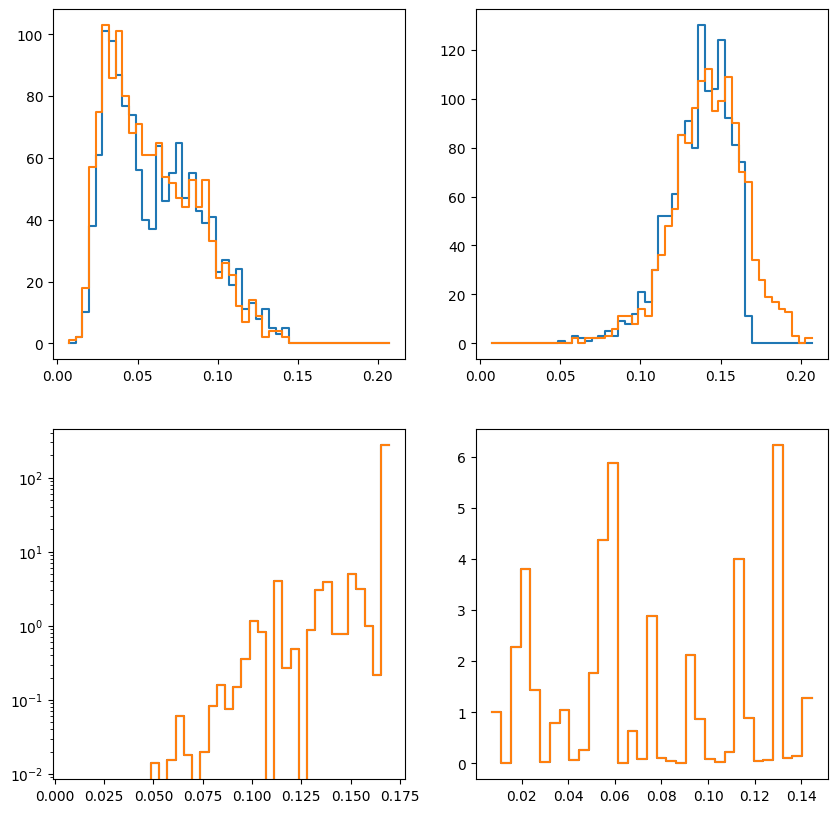

quantile: 0.03359818286283781
100368.98659312725


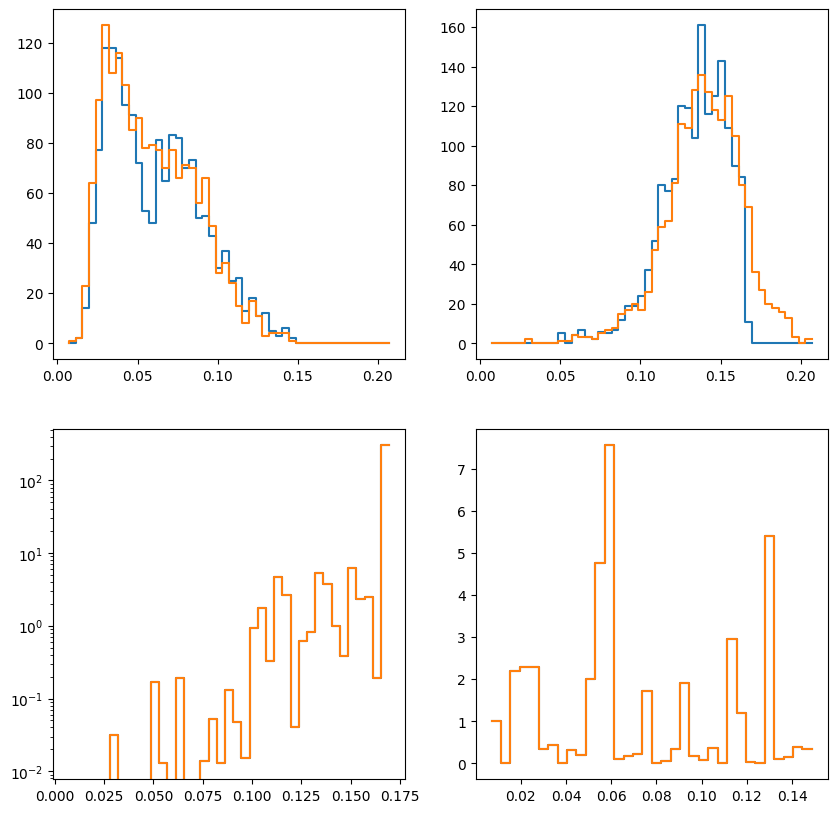

quantile: 0.04281332398719394
100368.98659312725


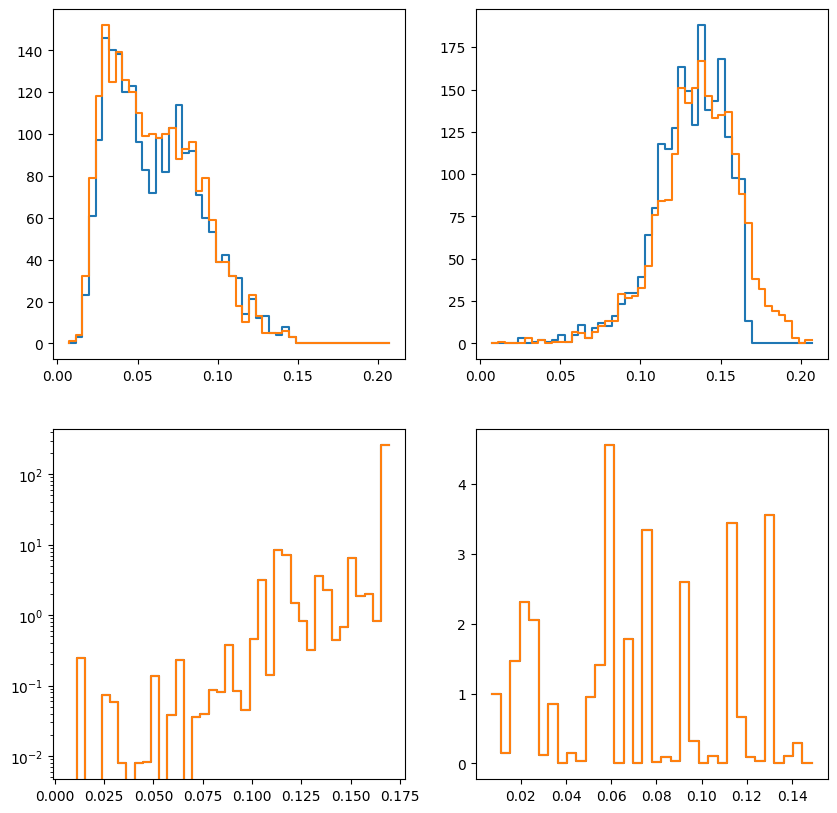

quantile: 0.0545559478116852
100368.98659312725


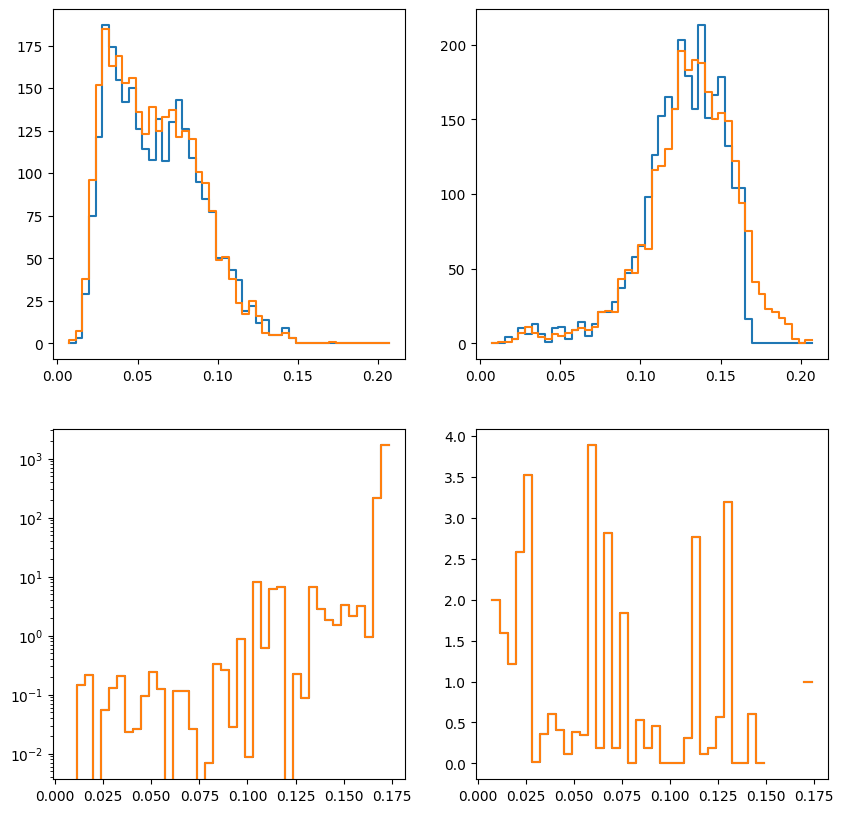

quantile: 0.06951927961775606
100368.98659312725


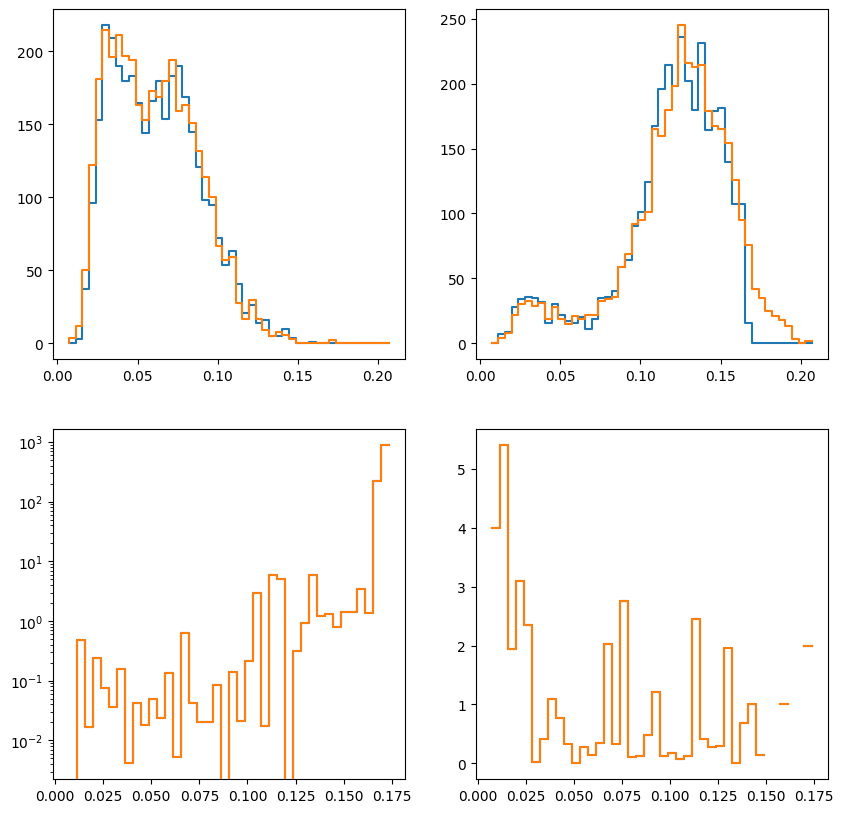

quantile: 0.08858667904100823
100368.98659312725


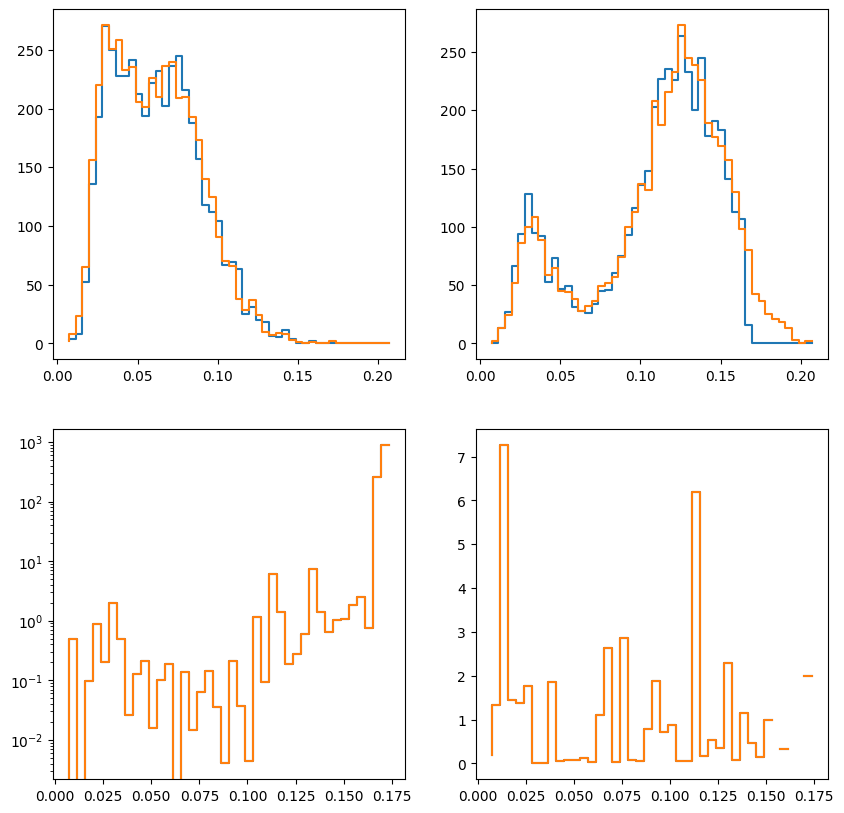

quantile: 0.11288378916846889
100368.98659312725


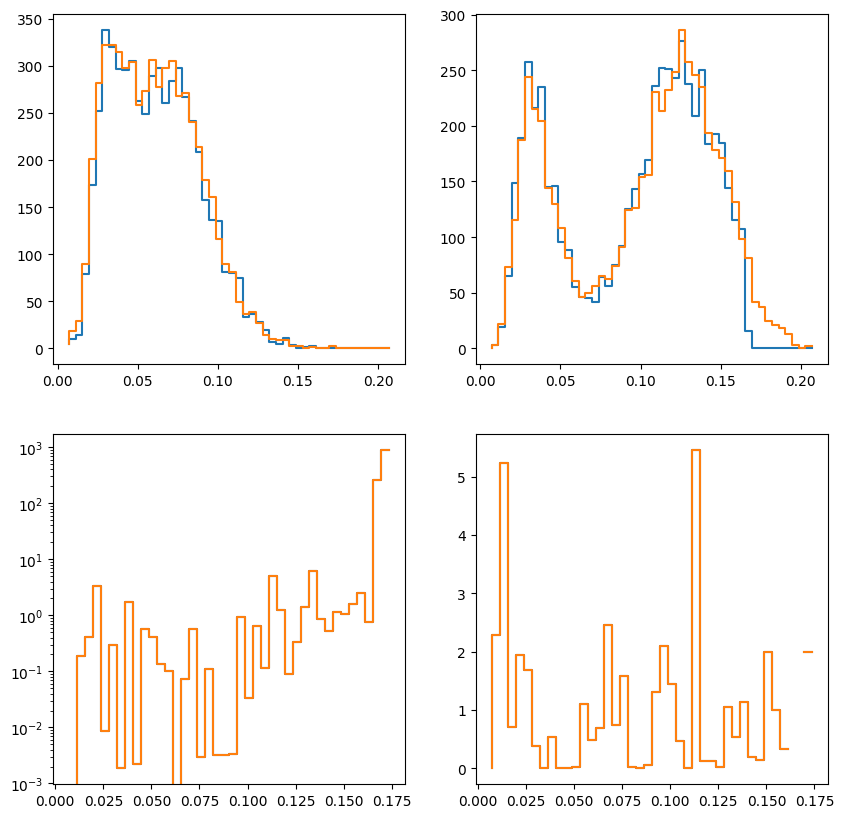

quantile: 0.14384498882876628
100368.98659312725


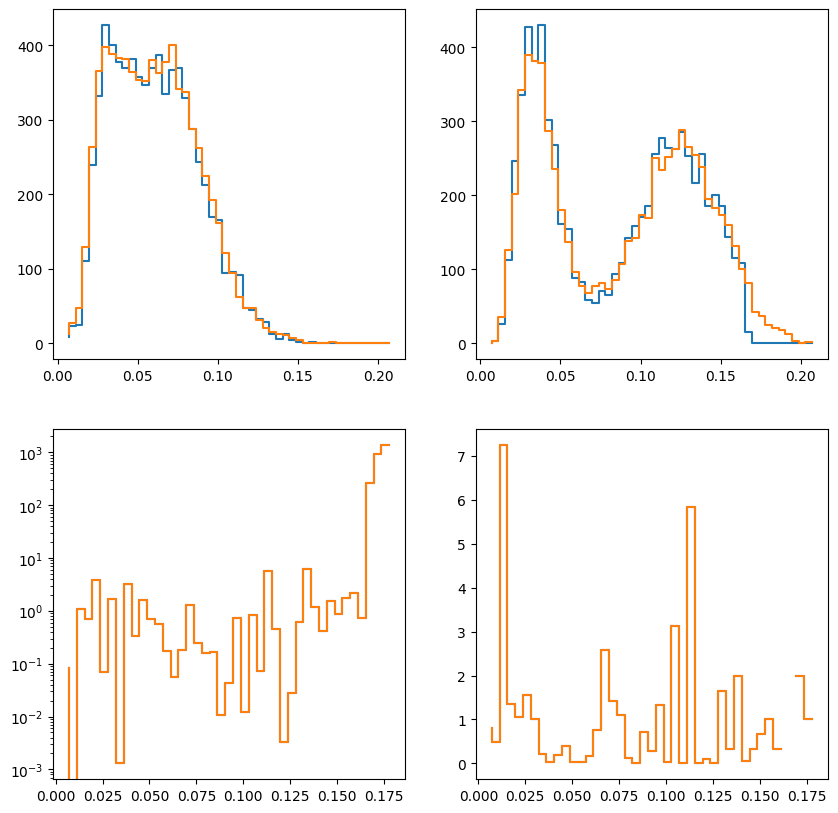

quantile: 0.18329807108324356
100368.98659312725


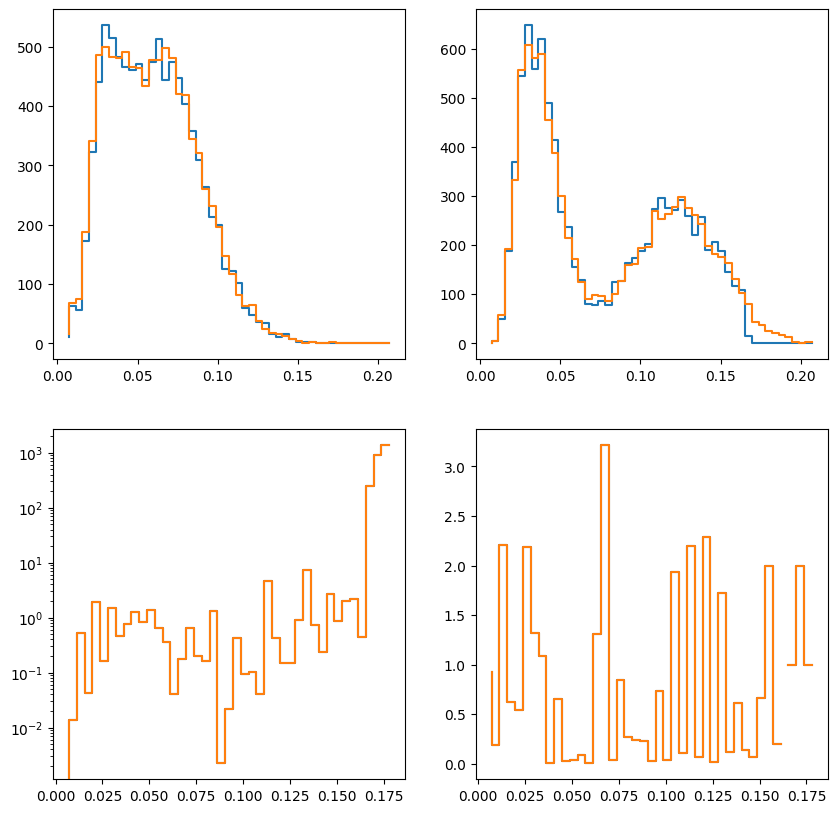

quantile: 0.23357214690901212
100368.98659312725


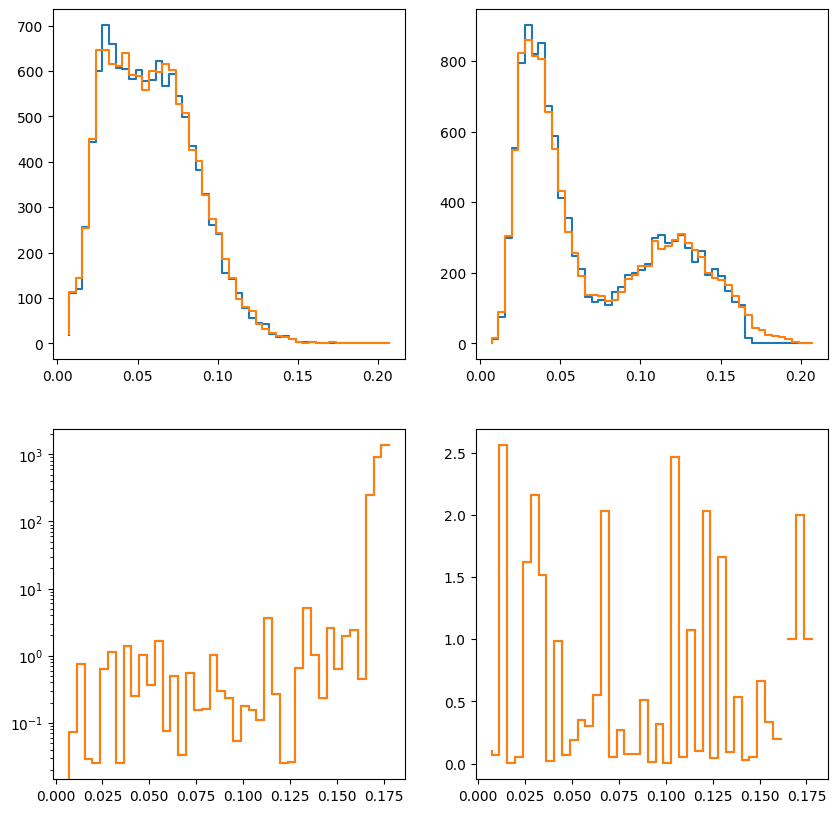

quantile: 0.29763514416313175
100368.98659312725


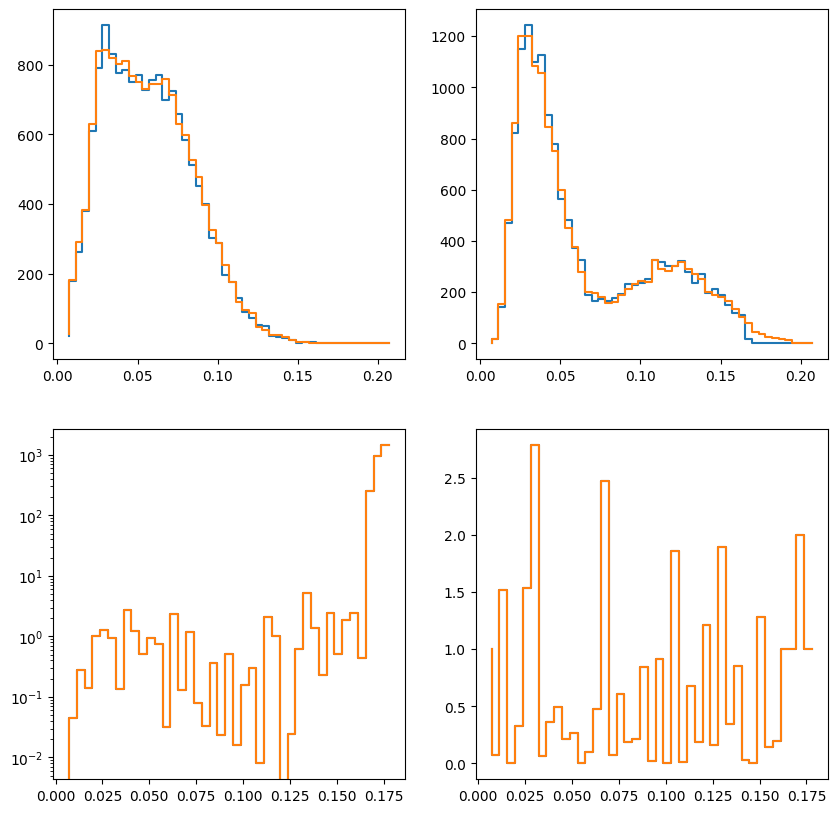

quantile: 0.37926901907322497
100368.98659312725


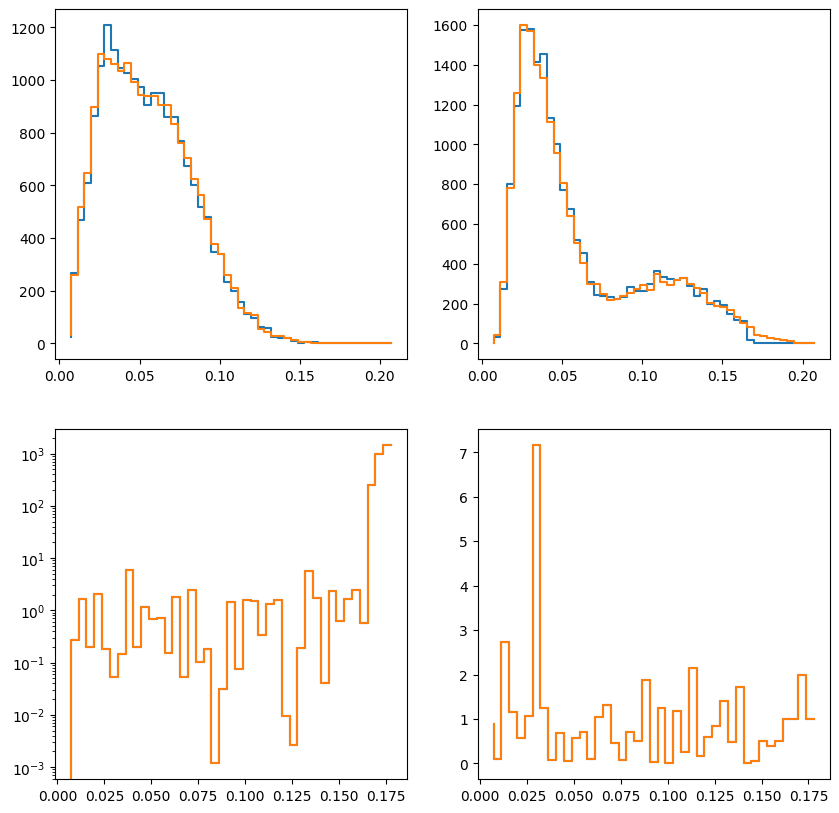

quantile: 0.4832930238571752
100368.98659312725


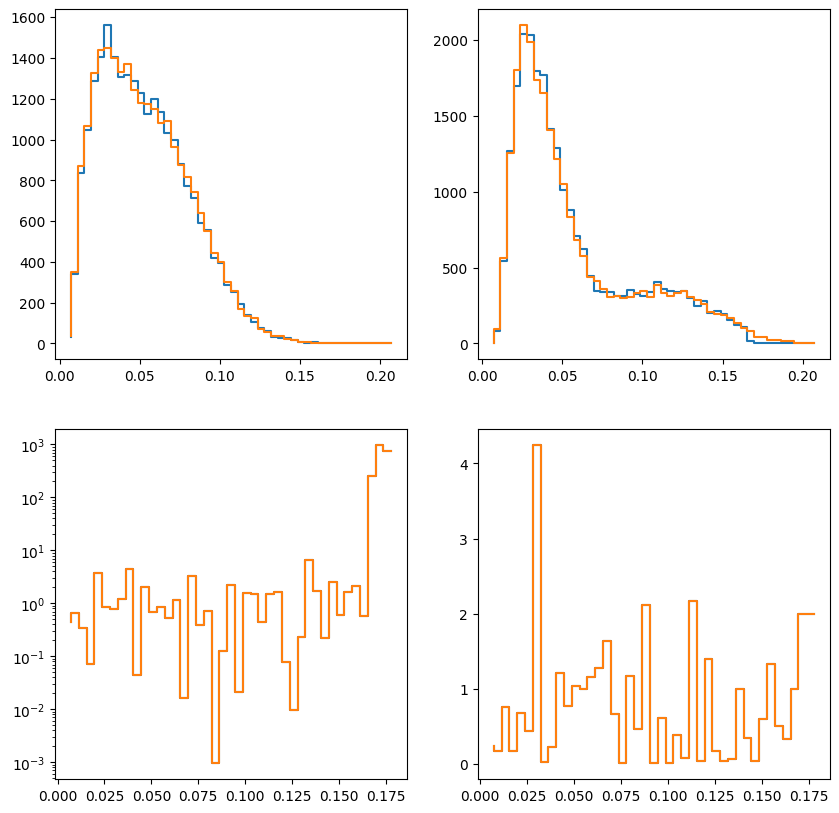

quantile: 0.615848211066026
100368.98659312725


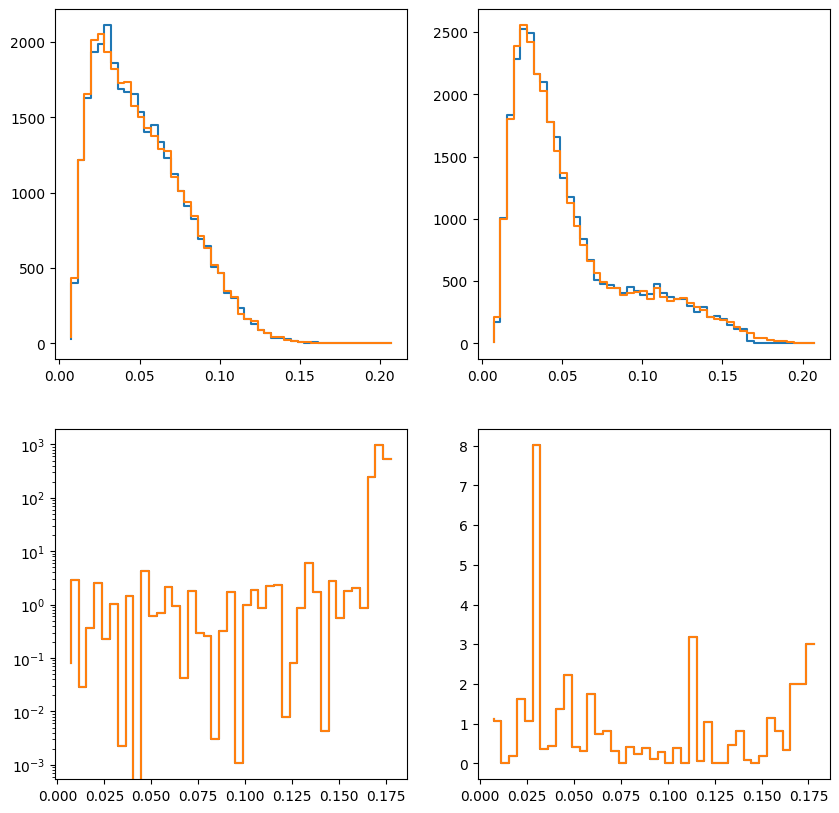

quantile: 0.7847599703514611
100368.98659312725


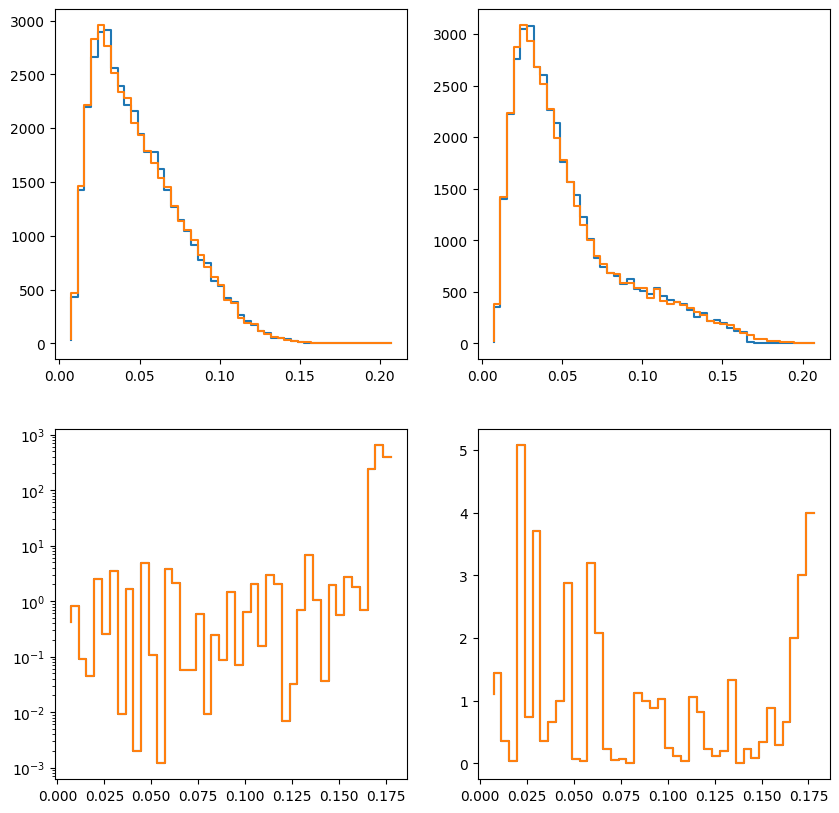

quantile: 1.0
100368.98659312725


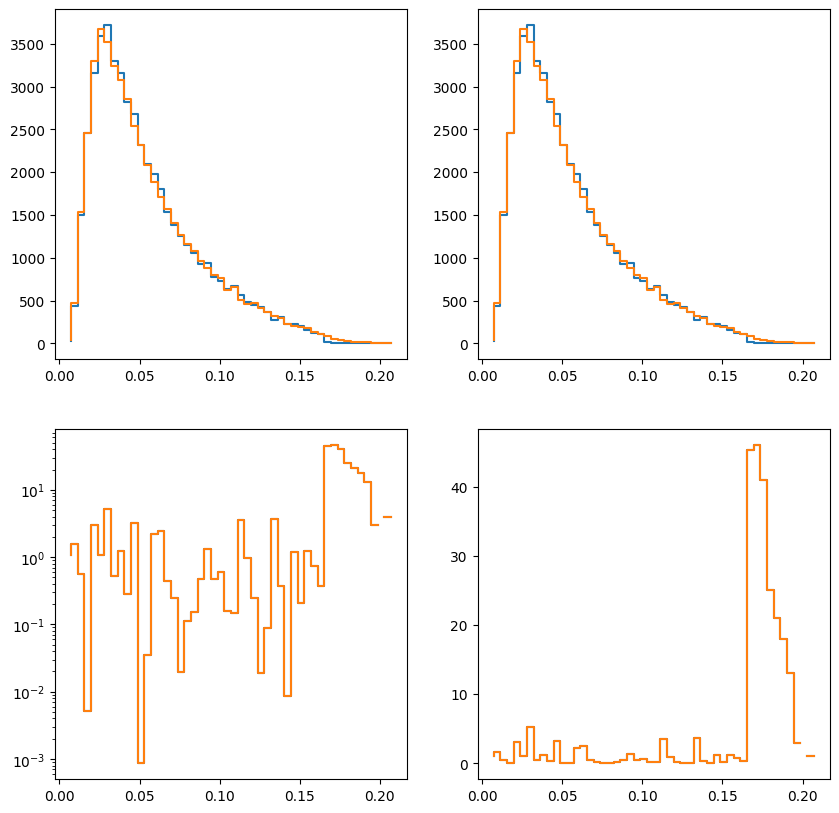

In [136]:
percentiles = np.logspace(-2,0,20)



chi2_0_1_low_tailcut_1 = []
chi2_0_1_up_tailcut_1 = []
bins_array_low = []
bins_array_up = []

bins = np.linspace(min(mjj), max(mjj), 50)



for quantile in percentiles:

    lower_threshold = np.quantile(weight, quantile)
    upper_threshold = np.quantile(weight, 1-quantile)

    print(f'quantile: {quantile}')
    print(sum(weight))

    mjj_0 = mjj[label==0]
    mjj_1 = mjj[label==1]

    w_0 = weight[label==0]
    w_1 = weight[label==1]

   # scale_0 = len(w_0)
   # scale_1 = len(w_1)

    m_0_lower = mjj_0[ w_0 < lower_threshold]
    m_1_lower = mjj_1[ w_1 < lower_threshold]

    m_0_upper = mjj_0[ w_0 > upper_threshold]
    m_1_upper = mjj_1[ w_1 > upper_threshold]

    hist_0_lower, bin_0_lower = np.histogram(m_0_lower, bins=bins)
    hist_1_lower, bin_1_lower = np.histogram(m_1_lower, bins=bins)

    hist_0_upper, bin_0_upper = np.histogram(m_0_upper, bins=bins)
    hist_1_upper, bin_1_upper = np.histogram(m_1_upper, bins=bins)


    hist_0_upper = hist_0_upper[(hist_0_upper>0)| (hist_1_upper>0)]
    hist_1_upper = hist_1_upper[hist_1_upper>0]



    hist_0_lower = hist_0_lower[hist_0_lower>0]
    hist_1_lower = hist_1_lower[hist_1_lower>0]

  #  hist_0_scale_u = np.sum(hist_0_upper)
  #  hist_1_scale_u = np.sum(hist_1_upper)

    chi2_0_1_l_hist = (hist_0_lower - hist_1_lower)**2/ \
                      (hist_0_lower + hist_1_lower)
    chi2_0_1_u_hist = (hist_0_upper - hist_1_upper)**2/ \
                      (hist_0_upper + hist_1_upper)

    chi2_0_1_l = np.sum((hist_0_lower - hist_1_lower)**2/
                      (hist_0_lower + hist_1_lower))
                     
    chi2_0_1_u = np.sum((hist_0_upper - hist_1_upper)**2/
                      (hist_0_upper + hist_1_upper))
    
    
    chi2_0_1_low_tailcut_1.append(chi2_0_1_l)
    chi2_0_1_up_tailcut_1.append(chi2_0_1_u)

    non_empty_bins_u = len(np.argwhere((hist_0_upper + hist_1_upper) > 0))
    non_empty_bins_l = len(np.argwhere((hist_0_lower + hist_1_lower) > 0))

    bins_array_low.append(non_empty_bins_l)
    bins_array_up.append(non_empty_bins_u)

    figure = plt.figure(figsize=(10,10))
    # make 4 plots together


    plt.subplot(2,2,1)
    plt.step(bin_0_lower[:-1], hist_0_lower, label='weight')
    plt.step(bin_1_lower[:-1], hist_1_lower, label='weight')
   # plt.show()
    #plt.hist(m_0_lower, bins=bins,histtype='step', label='weight', density=False)
    #plt.hist(m_1_lower, bins=bins,histtype='step', label='weight', density=False)
    #plt.yscale('log')

    plt.subplot(2,2,2)
    plt.step(bin_0_upper[:-1], hist_0_upper, label='weight')
    plt.step(bin_1_upper[:-1], hist_1_upper, label='weight')
    #plt.show()
    #plt.hist(m_0_upper, bins=bins,histtype='step', label='weight', density=False)
    #plt.hist(m_1_upper, bins=bins,histtype='step', label='weight', density=False)
    #plt.yscale('log')
    #plt.show()
    plt.subplot(2,2,3)
    plt.step(bin_0_upper[:-1], chi2_0_1_u_hist, label='weight')
    plt.step(bin_1_upper[:-1], chi2_0_1_u_hist, label='weight')
    plt.yscale('log')
    #plt.show()

    plt.subplot(2,2,4)
    plt.step(bin_0_lower[:-1], chi2_0_1_l_hist, label='weight')
    plt.step(bin_1_lower[:-1], chi2_0_1_l_hist, label='weight')
    plt.show()

   # low_hist, _ = np.histogram(m_lower, bins=bins)
   # high_hist, _ = np.histogram(m_upper, bins=bins)



In [96]:
p_l_tailcut = 1-chi2.cdf(np.array(chi2_0_1_low_tailcut), np.array(bins_array_low)-1)
p_u_tailcut = 1-chi2.cdf(np.array(chi2_0_1_up_tailcut), np.array(bins_array_up)-1)

In [90]:
np.array(chi2_0_1_up_tailcut)

array([130.87524071, 144.11679622, 159.14612099, 171.58526446,
       189.82177912, 205.39871977, 226.63582539, 236.22889506,
       224.40076655, 228.87695094, 230.86656328, 243.03116528,
       236.25538665, 231.39582685, 236.99711735, 245.54389573,
       255.74217988, 252.52302945, 250.23020533, 253.61352761])

In [97]:
p_u_tailcut

array([3.10862447e-15, 1.11022302e-16, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

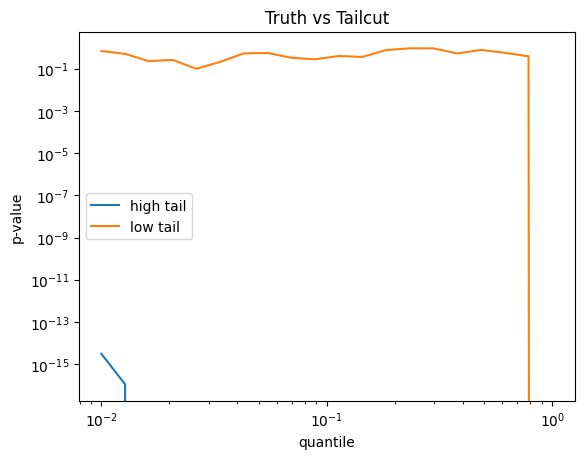

In [99]:
#plt.plot(percentiles, p_l )
plt.plot(percentiles, p_u_tailcut, label='high tail')
plt.plot(percentiles, p_l_tailcut, label='low tail')
plt.legend(loc='best')
plt.title('Truth vs Tailcut')
plt.xlabel('quantile')
plt.ylabel('p-value')
plt.yscale('log')
plt.xscale('log')
plt.show()

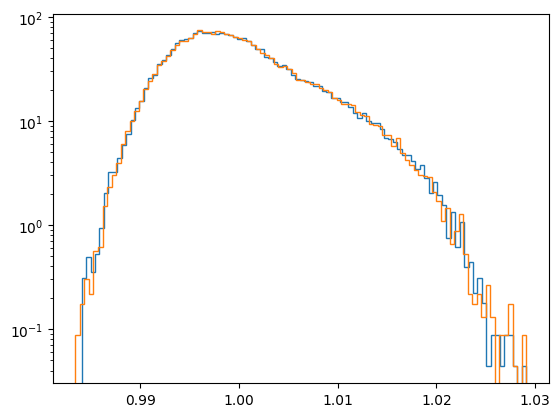

In [100]:
trial = 4
distortion = 'truth'
score_val = np.load(f'output/trial_{trial}_pn_lite_{distortion}/best_model_val_loss.npy')[:,0]
weight = score_val/(1-score_val)

jets = pd.read_hdf('data/jetnet30_data.h5', f'particle_data_{distortion}_valid').values.reshape(-1,30,4)
label = pd.read_hdf('data/jetnet30_data.h5', f'labels__{distortion}_valid')['labels'].values
mjj = mjj_jets(jets)

plt.hist(weight[label==0], bins=100,histtype='step', label='weight', density=True)
plt.hist(weight[label==1], bins=100,histtype='step', label='weight', density=True)
plt.yscale('log')
plt.show()

quantile: 0.01


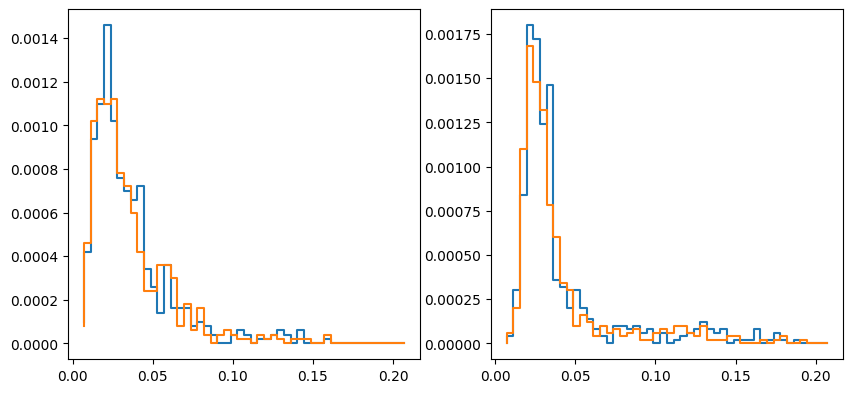

quantile: 0.012742749857031334


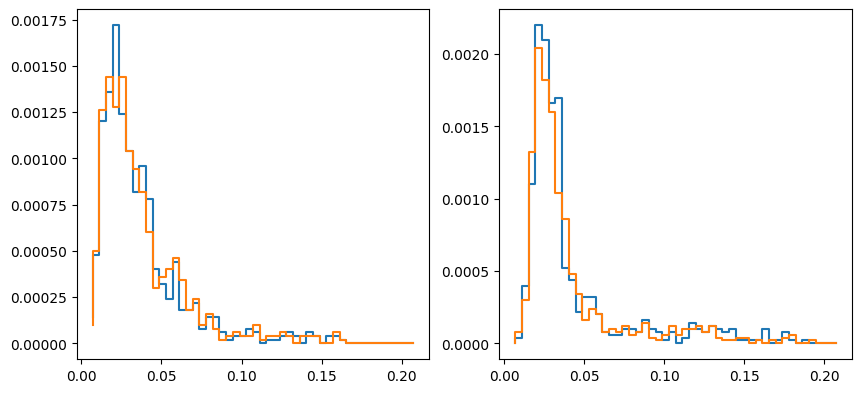

quantile: 0.016237767391887217


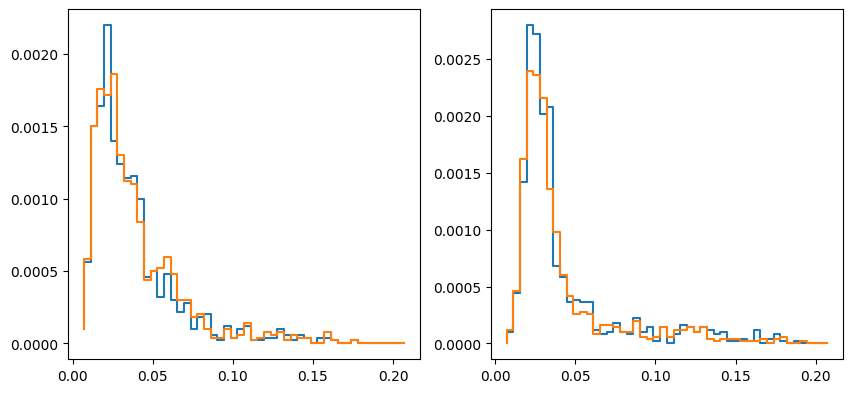

quantile: 0.0206913808111479


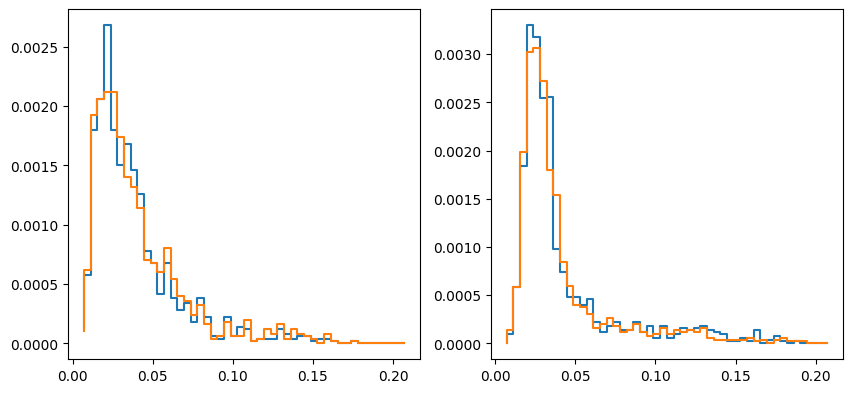

quantile: 0.026366508987303583


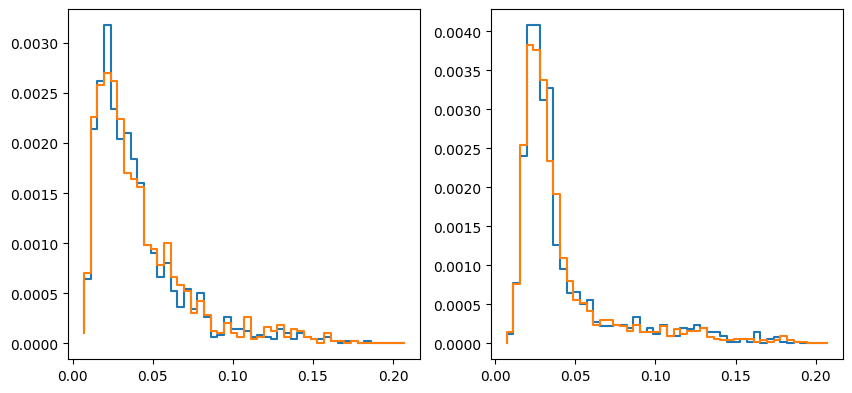

quantile: 0.03359818286283781


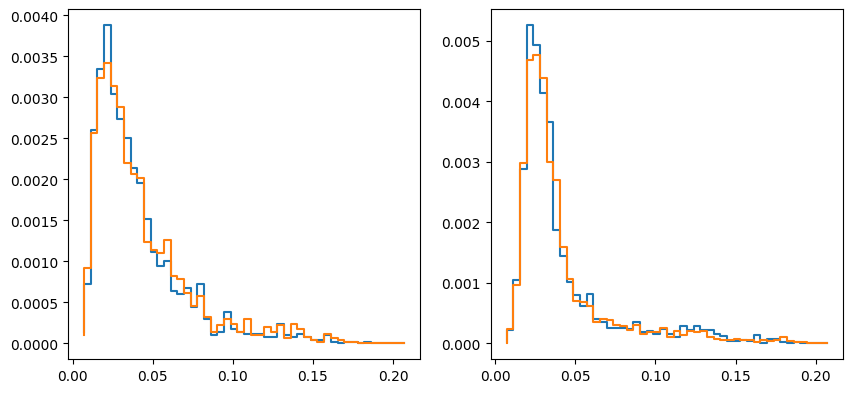

quantile: 0.04281332398719394


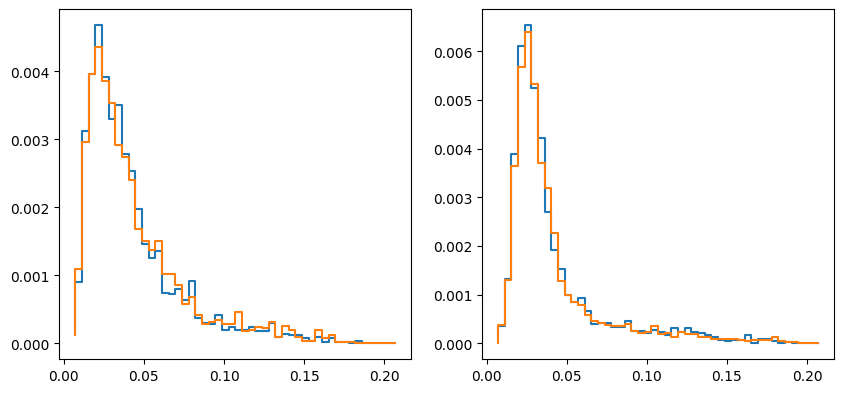

quantile: 0.0545559478116852


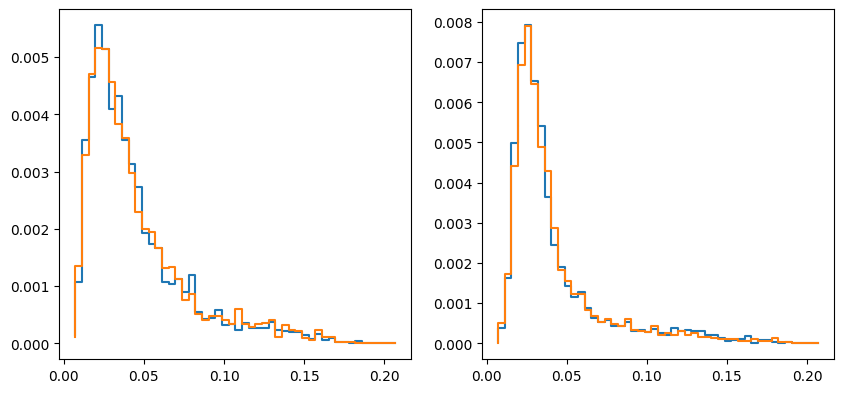

quantile: 0.06951927961775606


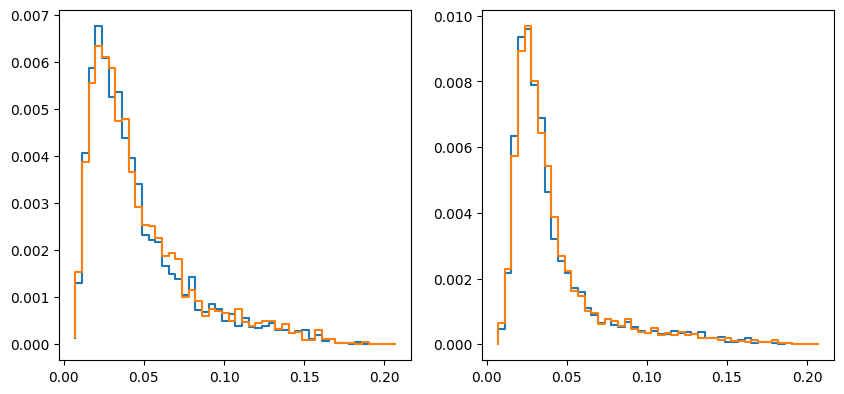

quantile: 0.08858667904100823


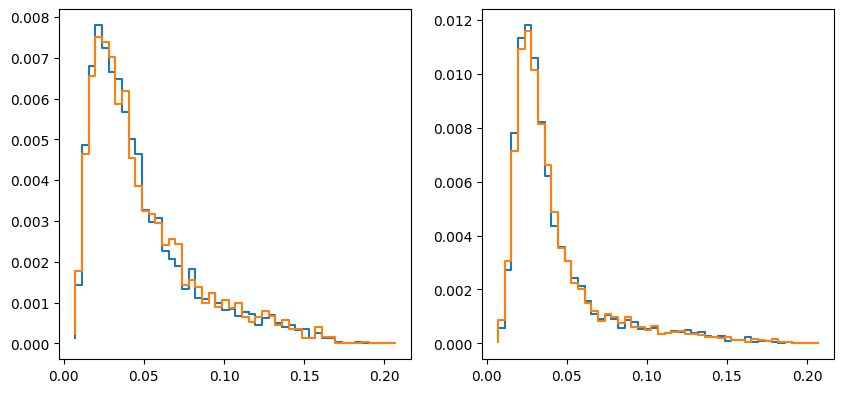

quantile: 0.11288378916846889


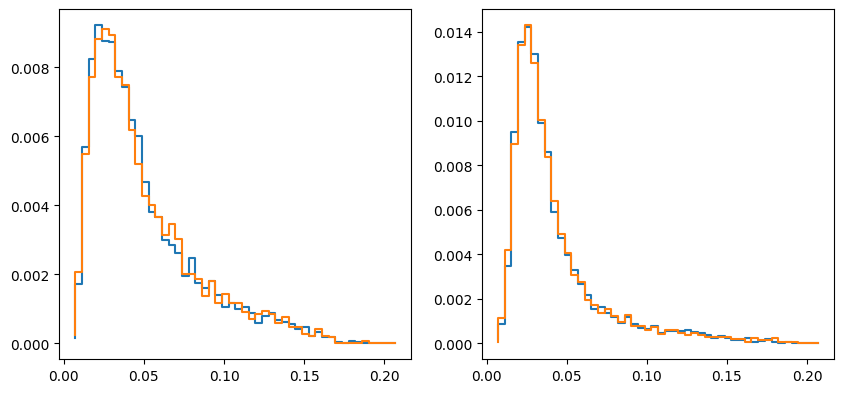

quantile: 0.14384498882876628


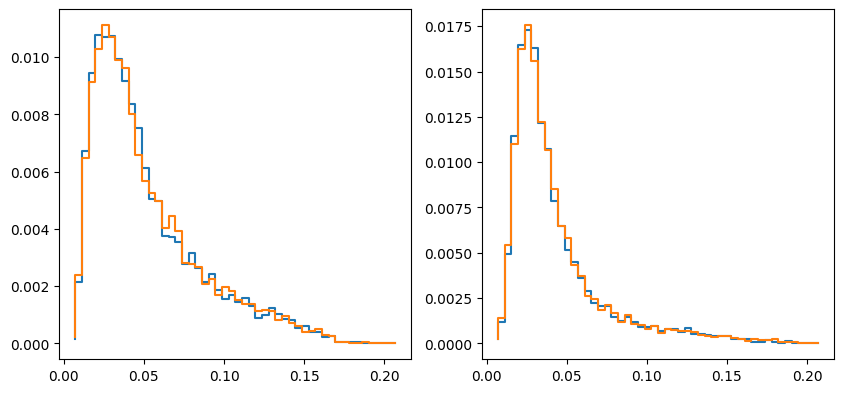

quantile: 0.18329807108324356


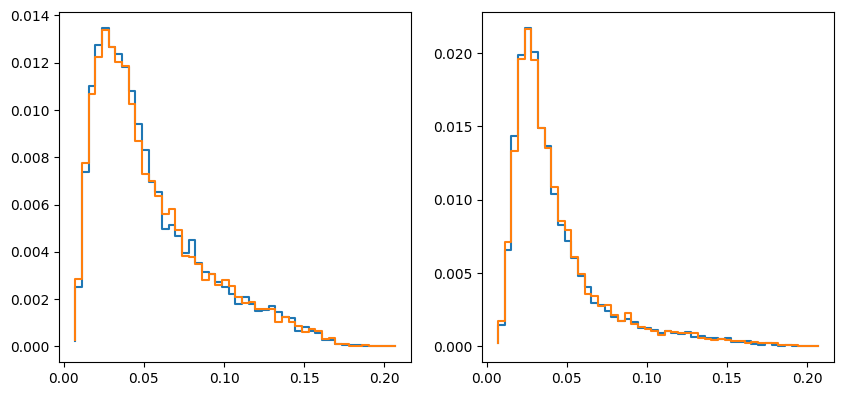

quantile: 0.23357214690901212


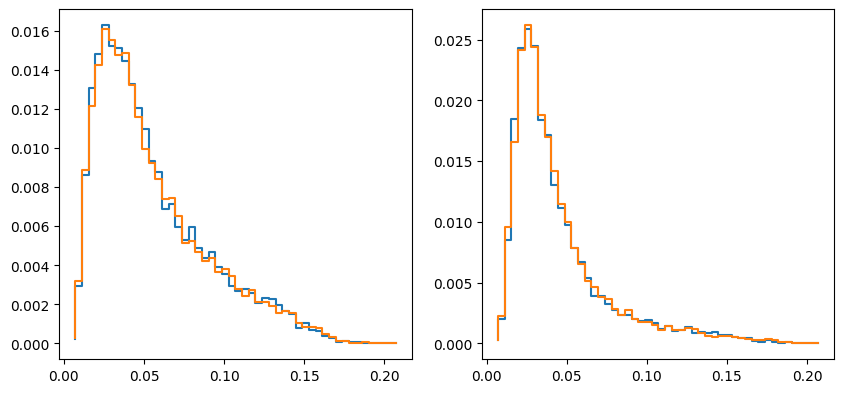

quantile: 0.29763514416313175


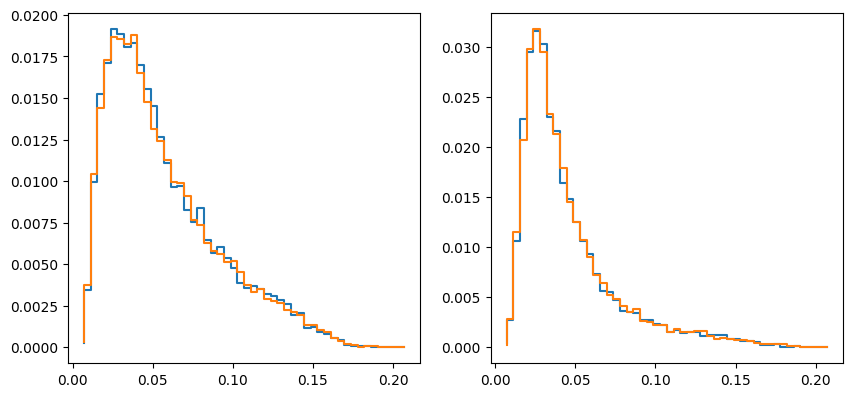

quantile: 0.37926901907322497


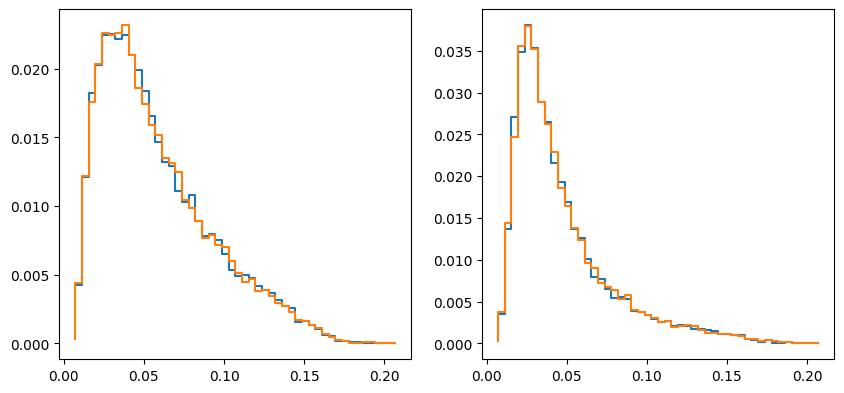

quantile: 0.4832930238571752


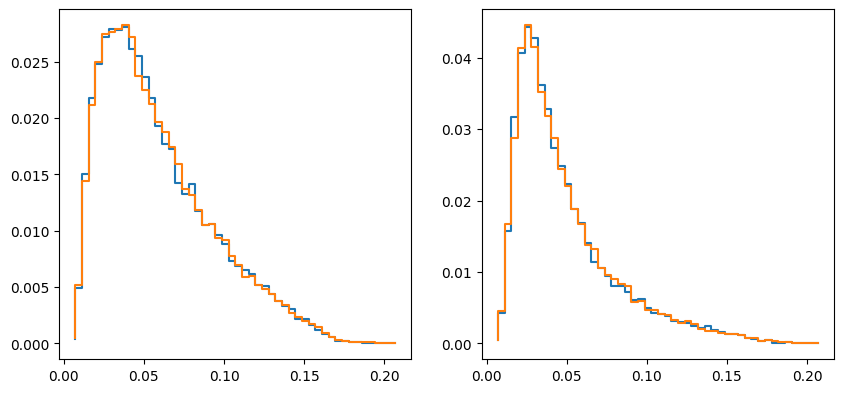

quantile: 0.615848211066026


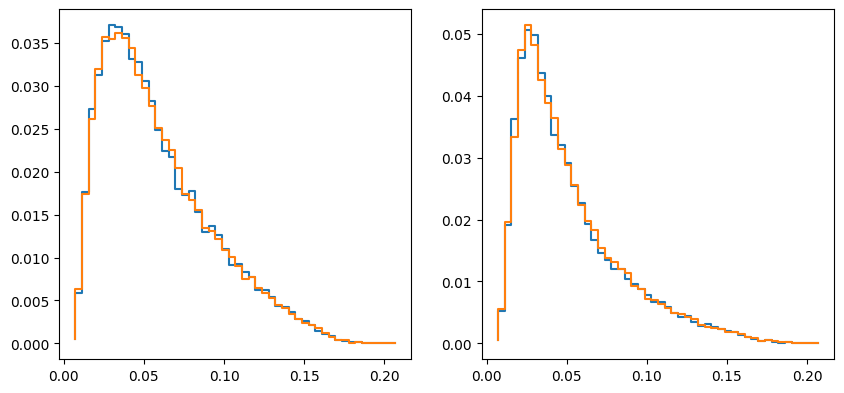

quantile: 0.7847599703514611


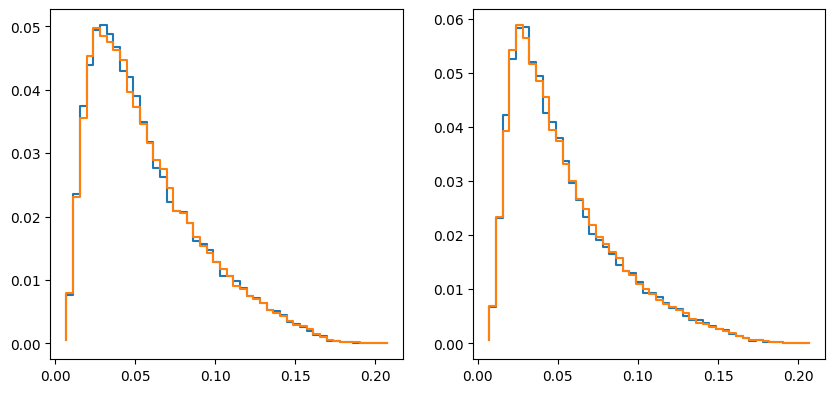

quantile: 1.0


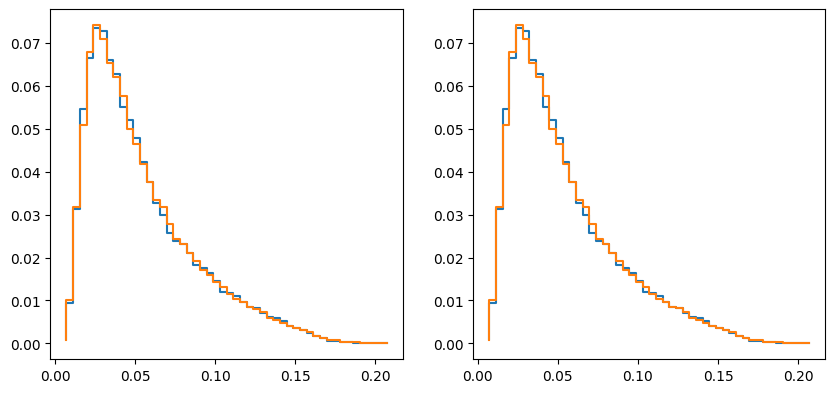

In [101]:
percentiles = np.logspace(-2,0,20)

chi2_0_1_low_truth = []
chi2_0_1_up_truth = []
bins_array_low = []
bins_array_up = []


bins = np.linspace(min(mjj), max(mjj), 50)



for quantile in percentiles:

    lower_threshold = np.quantile(weight, quantile)
    upper_threshold = np.quantile(weight, 1-quantile)

    print(f'quantile: {quantile}')

    mjj_0 = mjj[label==0]
    mjj_1 = mjj[label==1]

    w_0 = weight[label==0]
    w_1 = weight[label==1]

    scale_0 = len(w_0)
    scale_1 = len(w_1)
    

    m_0_lower = mjj_0[ w_0 < lower_threshold]
    m_1_lower = mjj_1[ w_1 < lower_threshold]

    m_0_upper = mjj_0[ w_0 > upper_threshold]
    m_1_upper = mjj_1[ w_1 > upper_threshold]

    hist_0_lower,_ = np.histogram(m_0_lower, bins=bins)
    hist_1_lower,_ = np.histogram(m_1_lower, bins=bins)

    hist_0_upper,_ = np.histogram(m_0_upper, bins=bins)
    hist_1_upper,_ = np.histogram(m_1_upper, bins=bins)

    hist_0_err_l = np.sqrt(hist_0_lower)
    hist_1_err_l = np.sqrt(hist_1_lower)

    #hist_0_scale_l = np.sum(hist_0_lower)
    #hist_1_scale_l = np.sum(hist_1_lower)

    hist_0_err_u = np.sqrt(hist_0_upper)
    hist_1_err_u = np.sqrt(hist_1_upper)

  #  hist_0_scale_u = np.sum(hist_0_upper)
  #  hist_1_scale_u = np.sum(hist_1_upper)

    

    chi2_0_1_l = np.sum((hist_0_lower/scale_0 - hist_1_lower/scale_1)**2/(
                      ((hist_0_err_l/scale_0)**2 + (hist_1_err_l/scale_1)**2)
                      +10**(-80)))
    chi2_0_1_u = np.sum((hist_0_upper/scale_0 - hist_1_upper/scale_1)**2/(
                      ((hist_0_err_u/scale_0)**2 + (hist_1_err_u/scale_1)**2)
                      +10**(-80)))
    
    
    chi2_0_1_low_truth.append(chi2_0_1_l)
    chi2_0_1_up_truth.append(chi2_0_1_u)

    non_empty_bins_u = len(np.argwhere((hist_0_upper + hist_1_upper) > 0))
    non_empty_bins_l = len(np.argwhere((hist_0_lower + hist_1_lower) > 0))

    bins_array_low.append(non_empty_bins_l)
    bins_array_up.append(non_empty_bins_u)

    figure = plt.figure(figsize=(10,10))


    plt.subplot(2,2,1)
    plt.step(bin_0_lower[:-1], hist_0_lower/scale_0, label='weight')
    plt.step(bin_1_lower[:-1], hist_1_lower/scale_1, label='weight')
   # plt.show()
    #plt.hist(m_0_lower, bins=bins,histtype='step', label='weight', density=False)
    #plt.hist(m_1_lower, bins=bins,histtype='step', label='weight', density=False)
    #plt.yscale('log')

    plt.subplot(2,2,2)
    plt.step(bin_0_upper[:-1], hist_0_upper/scale_0, label='weight')
    plt.step(bin_1_upper[:-1], hist_1_upper/scale_1, label='weight')
    plt.show()
    #plt.hist(m_0_upper, bins=bins,histtype='step', label='weight', density=False)
    #plt.hist(m_1_upper, bins=bins,histtype='step', label='weight', density=False)
    #plt.yscale('log')
    #plt.show()


   # low_hist, _ = np.histogram(m_lower, bins=bins)
   # high_hist, _ = np.histogram(m_upper, bins=bins)

   # low_hist, _ = np.histogram(m_lower, bins=bins)
   # high_hist, _ = np.histogram(m_upper, bins=bins)



In [102]:
p_l_truth = 1-chi2.cdf(np.array(chi2_0_1_low_truth), np.array(bins_array_low)-1)
p_u_truth = 1-chi2.cdf(np.array(chi2_0_1_up_truth), np.array(bins_array_up)-1)

In [230]:
p_u_truth

array([0.48208244, 0.89627628, 0.96520945, 0.98938205, 0.98496807,
       0.98804101, 0.99891474, 0.99672085, 0.99869579, 0.99898821,
       0.99279028, 0.99989891, 0.99994312, 0.99919701, 0.99897588,
       0.99928011, 0.99631494, 0.99769395, 0.99899669, 0.99936139])

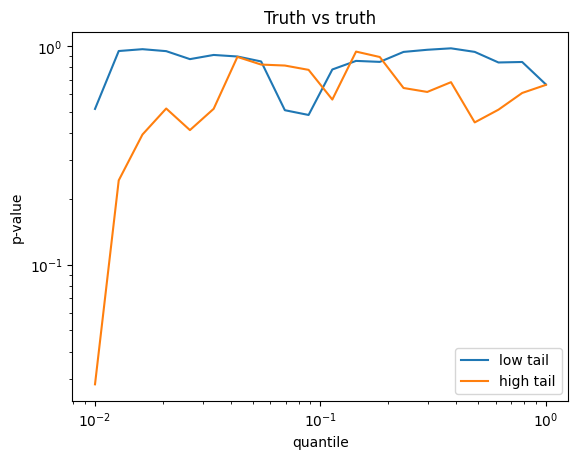

In [103]:
plt.plot(percentiles, p_l_truth, label='low tail' )
plt.plot(percentiles, p_u_truth, label='high tail')
#plt.plot(percentiles, p_l_tailcut, label='tailcut weights')
plt.title('Truth vs truth')
plt.legend()
plt.xlabel('quantile')
plt.ylabel('p-value')
plt.yscale('log')
plt.xscale('log')
plt.show()

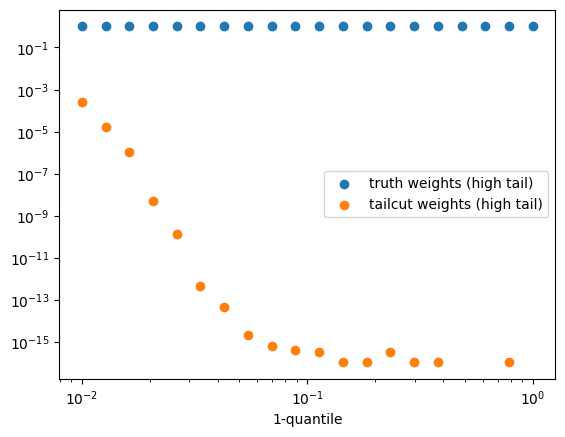

In [126]:
plt.scatter(percentiles, p_u_truth, label='truth weights (high tail)')
plt.scatter(percentiles, p_u_tailcut, label = 'tailcut weights (high tail)')
plt.legend()
plt.yscale('log')
plt.xlabel('1-quantile')
plt.xscale('log')
plt.show()

In [121]:
1-percentiles

array([0.99      , 0.98725725, 0.98376223, 0.97930862, 0.97363349,
       0.96640182, 0.95718668, 0.94544405, 0.93048072, 0.91141332,
       0.88711621, 0.85615501, 0.81670193, 0.76642785, 0.70236486,
       0.62073098, 0.51670698, 0.38415179, 0.21524003, 0.        ])

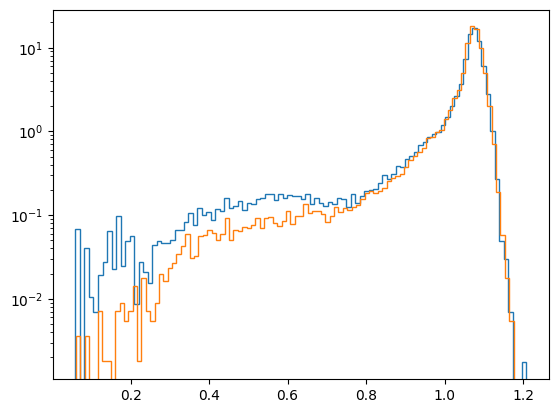

In [104]:
trial = 4
distortion = 'smeared'
score_val = np.load(f'output/trial_{trial}_pn_lite_{distortion}/best_model_val_loss.npy')[:,0]
weight = score_val/(1-score_val)

jets = pd.read_hdf('data/jetnet30_data.h5', f'particle_data_{distortion}_valid').values.reshape(-1,30,4)
label = pd.read_hdf('data/jetnet30_data.h5', f'labels__{distortion}_valid')['labels'].values
mjj = mjj_jets(jets)

plt.hist(weight[label==0], bins=100,histtype='step', label='weight', density=True)
plt.hist(weight[label==1], bins=100,histtype='step', label='weight', density=True)
plt.yscale('log')
plt.show()

quantile: 0.01


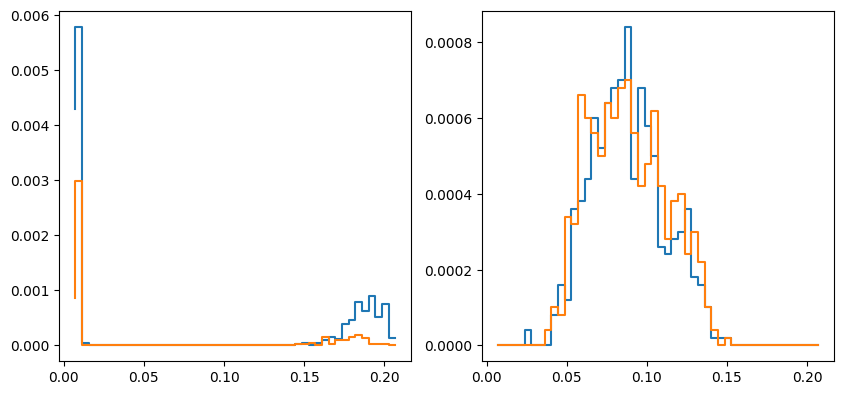

quantile: 0.012742749857031334


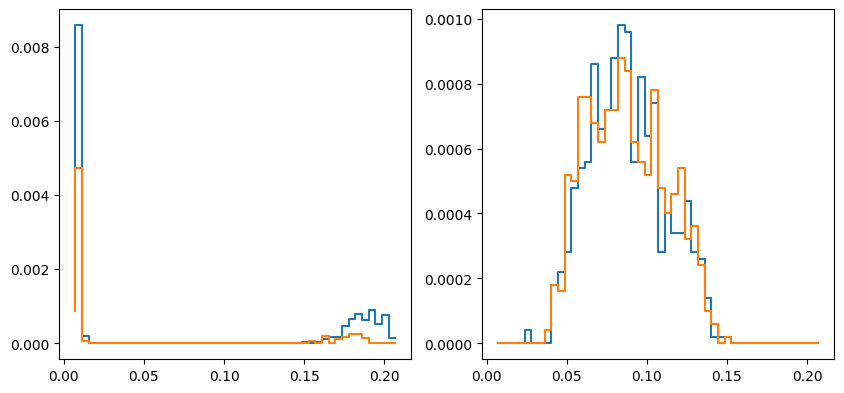

quantile: 0.016237767391887217


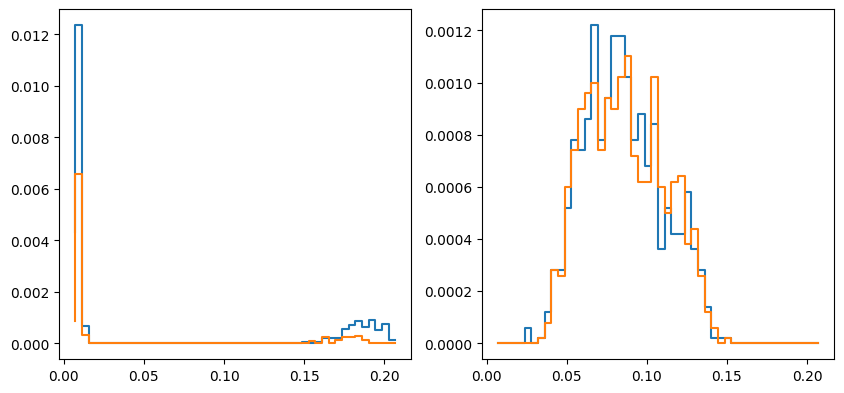

quantile: 0.0206913808111479


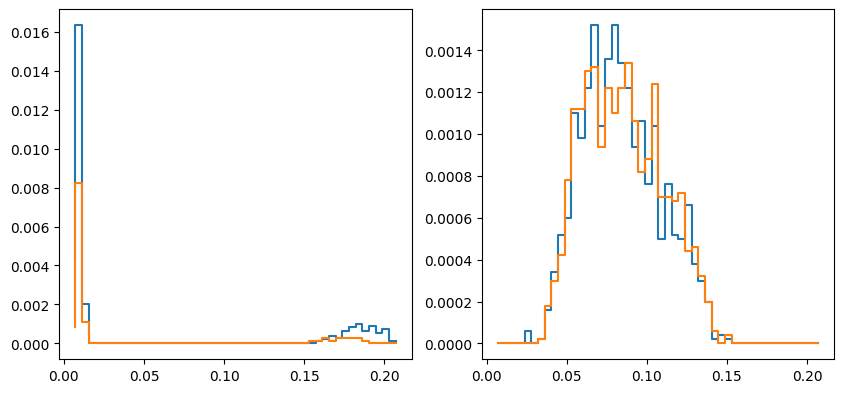

quantile: 0.026366508987303583


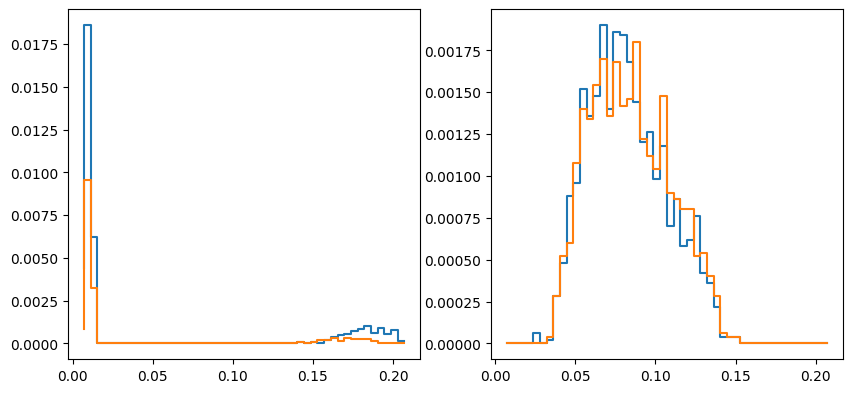

quantile: 0.03359818286283781


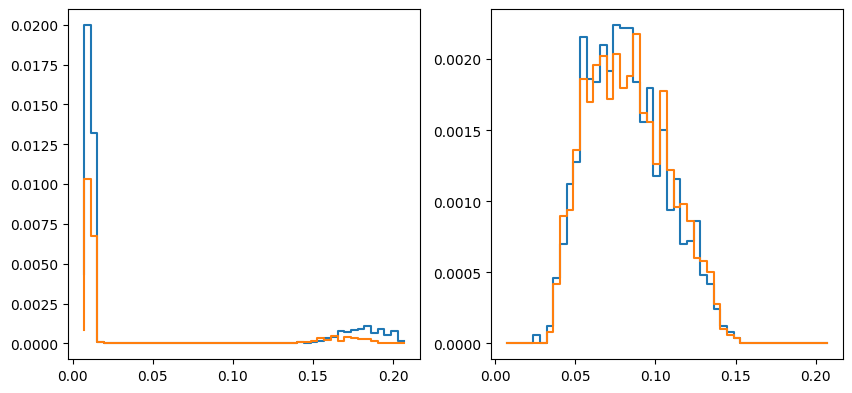

quantile: 0.04281332398719394


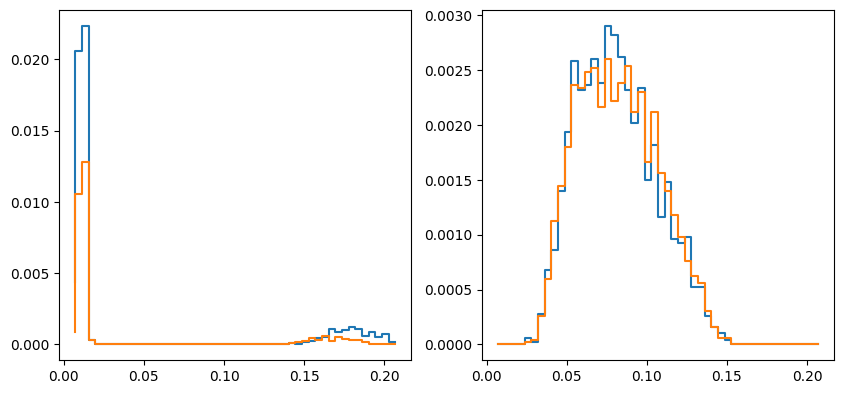

quantile: 0.0545559478116852


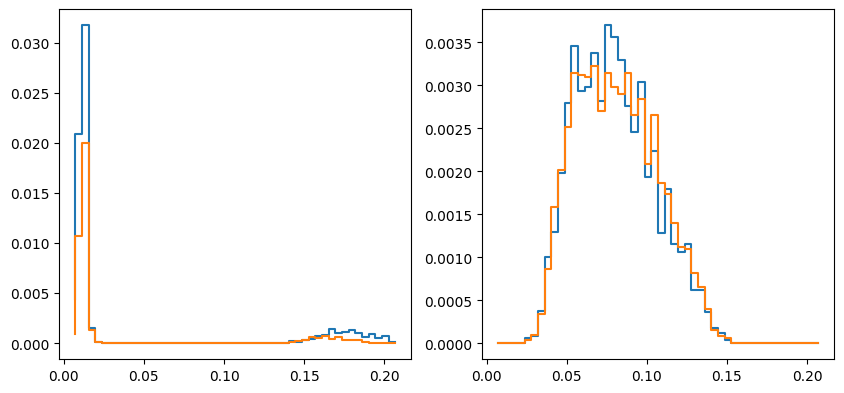

quantile: 0.06951927961775606


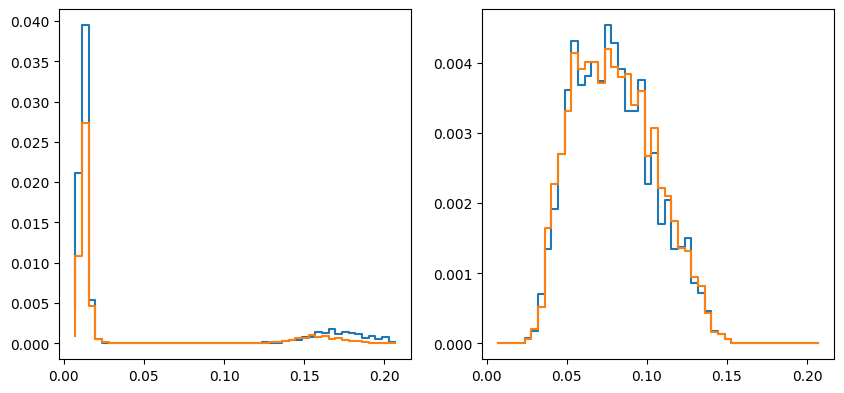

quantile: 0.08858667904100823


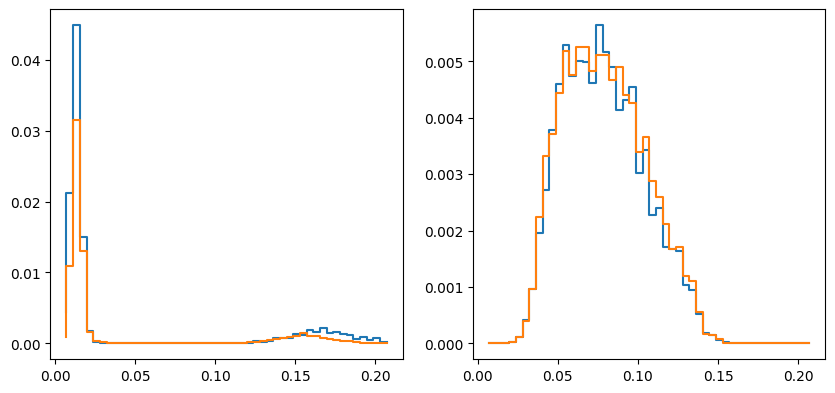

quantile: 0.11288378916846889


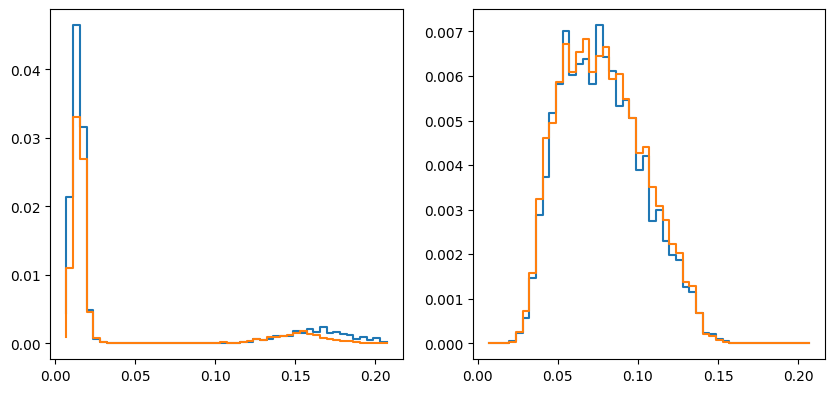

quantile: 0.14384498882876628


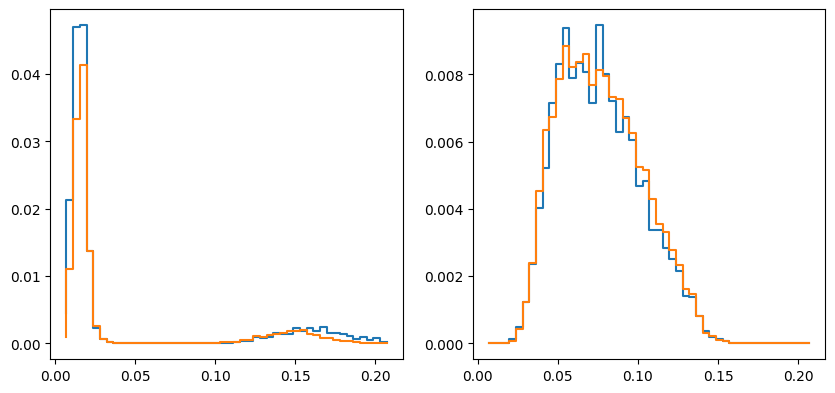

quantile: 0.18329807108324356


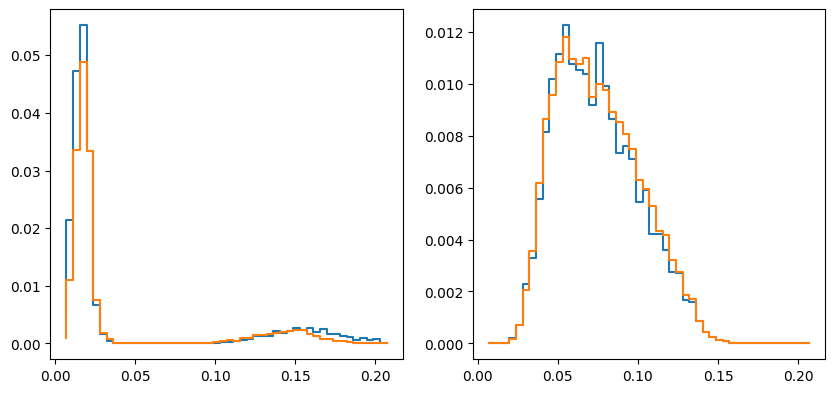

quantile: 0.23357214690901212


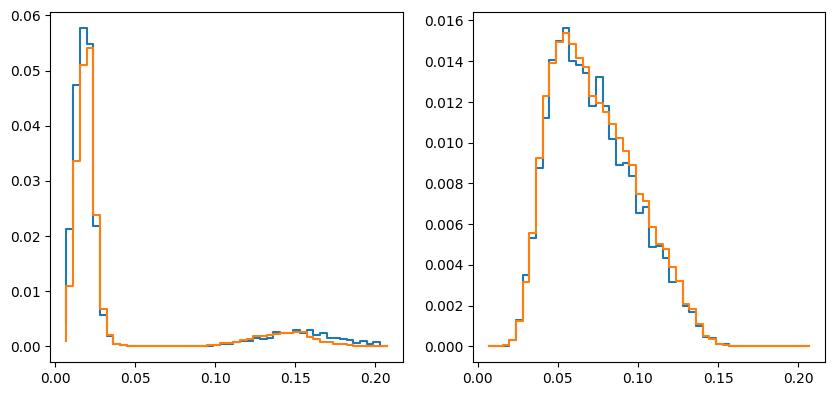

quantile: 0.29763514416313175


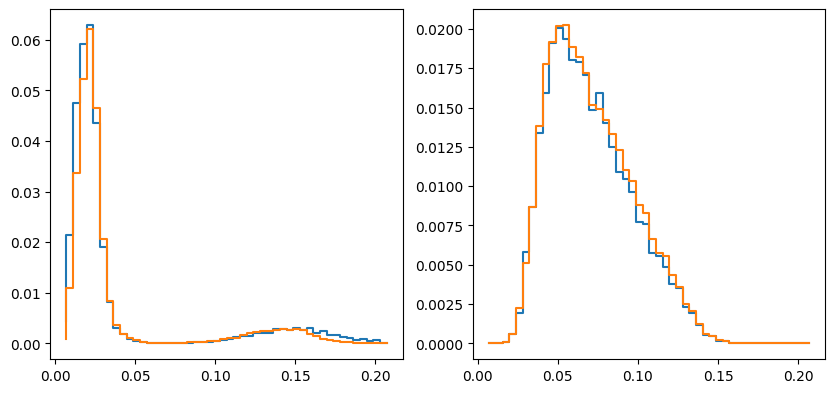

quantile: 0.37926901907322497


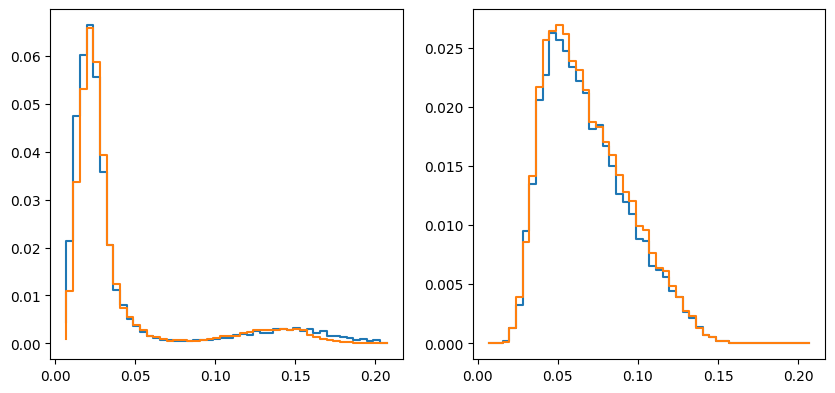

quantile: 0.4832930238571752


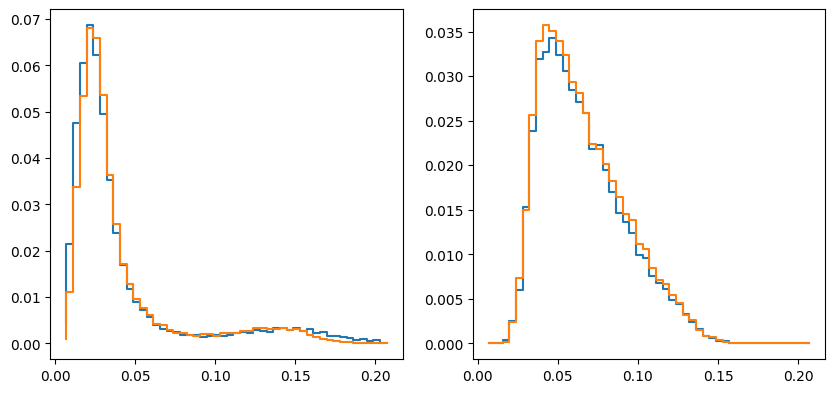

quantile: 0.615848211066026


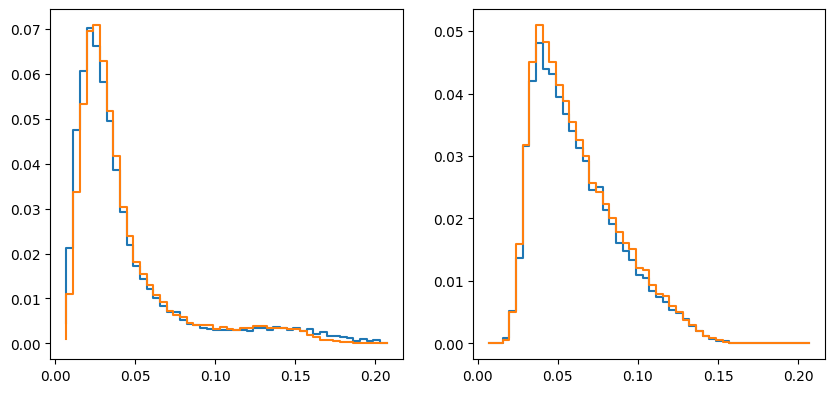

quantile: 0.7847599703514611


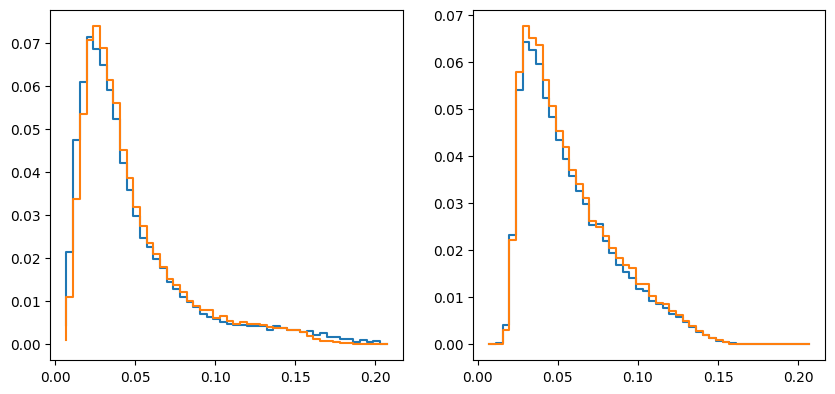

quantile: 1.0


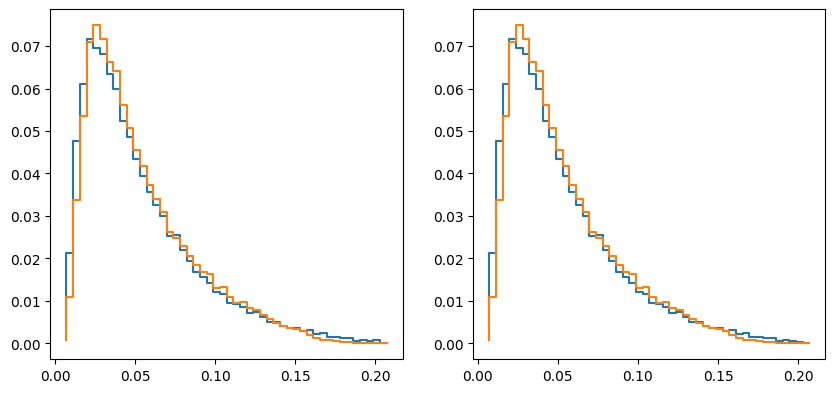

In [109]:
percentiles = np.logspace(-2,0,20)

chi2_0_1_low_smeared = []
chi2_0_1_up_smeared = []
bins_array = []
bins_array_low = []
bins_array_up = []

bins = np.linspace(min(mjj), max(mjj), 50)



for quantile in percentiles:

    lower_threshold = np.quantile(weight, quantile)
    upper_threshold = np.quantile(weight, 1-quantile)

    print(f'quantile: {quantile}')

    mjj_0 = mjj[label==0]
    mjj_1 = mjj[label==1]

    w_0 = weight[label==0]
    w_1 = weight[label==1]

    scale_0 = len(w_0)
    scale_1 = len(w_1)
    

    m_0_lower = mjj_0[ w_0 < lower_threshold]
    m_1_lower = mjj_1[ w_1 < lower_threshold]

    m_0_upper = mjj_0[ w_0 > upper_threshold]
    m_1_upper = mjj_1[ w_1 > upper_threshold]

    hist_0_lower,_ = np.histogram(m_0_lower, bins=bins)
    hist_1_lower,_ = np.histogram(m_1_lower, bins=bins)

    hist_0_upper,_ = np.histogram(m_0_upper, bins=bins)
    hist_1_upper,_ = np.histogram(m_1_upper, bins=bins)

    hist_0_err_l = np.sqrt(hist_0_lower)
    hist_1_err_l = np.sqrt(hist_1_lower)

    #hist_0_scale_l = np.sum(hist_0_lower)
    #hist_1_scale_l = np.sum(hist_1_lower)

    hist_0_err_u = np.sqrt(hist_0_upper)
    hist_1_err_u = np.sqrt(hist_1_upper)

  #  hist_0_scale_u = np.sum(hist_0_upper)
  #  hist_1_scale_u = np.sum(hist_1_upper)

    

    chi2_0_1_l = np.sum((hist_0_lower/scale_0 - hist_1_lower/scale_1)**2/(
                      ((hist_0_err_l/scale_0)**2 + (hist_1_err_l/scale_1)**2)
                      +10**(-80)))
    chi2_0_1_u = np.sum((hist_0_upper/scale_0 - hist_1_upper/scale_1)**2/(
                      ((hist_0_err_u/scale_0)**2 + (hist_1_err_u/scale_1)**2)
                      +10**(-80)))
    
    
    chi2_0_1_low_smeared.append(chi2_0_1_l)
    chi2_0_1_up_smeared.append(chi2_0_1_u)


    non_empty_bins_u = len(np.argwhere((hist_0_upper + hist_1_upper) > 0))
    non_empty_bins_l = len(np.argwhere((hist_0_lower + hist_1_lower) > 0))

    bins_array_low.append(non_empty_bins_l)
    bins_array_up.append(non_empty_bins_u)

    figure = plt.figure(figsize=(10,10))


    plt.subplot(2,2,1)
    plt.step(bin_0_lower[:-1], hist_0_lower/scale_0, label='weight')
    plt.step(bin_1_lower[:-1], hist_1_lower/scale_1, label='weight')
   # plt.show()
    #plt.hist(m_0_lower, bins=bins,histtype='step', label='weight', density=False)
    #plt.hist(m_1_lower, bins=bins,histtype='step', label='weight', density=False)
    #plt.yscale('log')

    plt.subplot(2,2,2)
    plt.step(bin_0_upper[:-1], hist_0_upper/scale_0, label='weight')
    plt.step(bin_1_upper[:-1], hist_1_upper/scale_1, label='weight')
    plt.show()


   # low_hist, _ = np.histogram(m_lower, bins=bins)
   # high_hist, _ = np.histogram(m_upper, bins=bins)



In [114]:
p_l_smeared

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [111]:
p_l_smeared = 1-chi2.cdf(np.array(chi2_0_1_low_smeared), 
                         np.array(bins_array_low)-1)
p_u_smeared = 1-chi2.cdf(np.array(chi2_0_1_up_smeared), 
                         np.array(bins_array_up)-1)

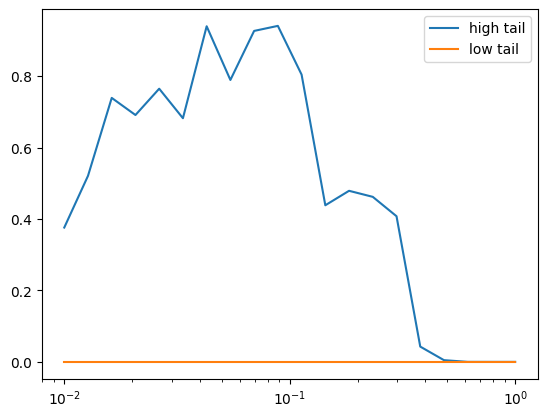

In [117]:
plt.plot(percentiles, p_u_smeared, label='high tail')
plt.plot(percentiles, p_l_smeared, label='low tail')
plt.legend()
#plt.yscale('log')
plt.xscale('log')
plt.show()

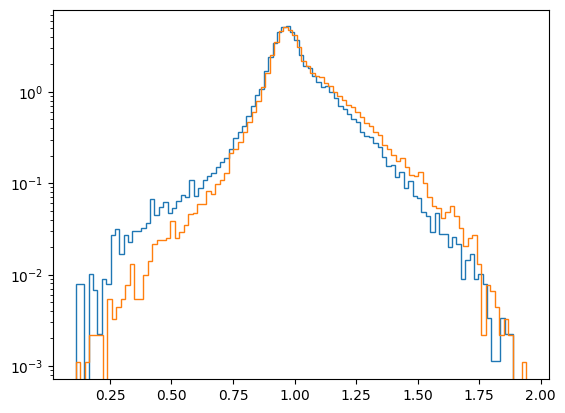

In [123]:
trial = 4
distortion = 'shifted'
score_val = np.load(f'output/trial_{trial}_pn_lite_{distortion}/best_model_val_loss.npy')[:,0]
weight = score_val/(1-score_val)

jets = pd.read_hdf('data/jetnet30_data.h5', f'particle_data_{distortion}_valid').values.reshape(-1,30,4)
label = pd.read_hdf('data/jetnet30_data.h5', f'labels__{distortion}_valid')['labels'].values
mjj = mjj_jets(jets)

plt.hist(weight[label==0], bins=100,histtype='step', label='weight', density=True)
plt.hist(weight[label==1], bins=100,histtype='step', label='weight', density=True)
plt.yscale('log')
plt.show()

quantile: 0.01


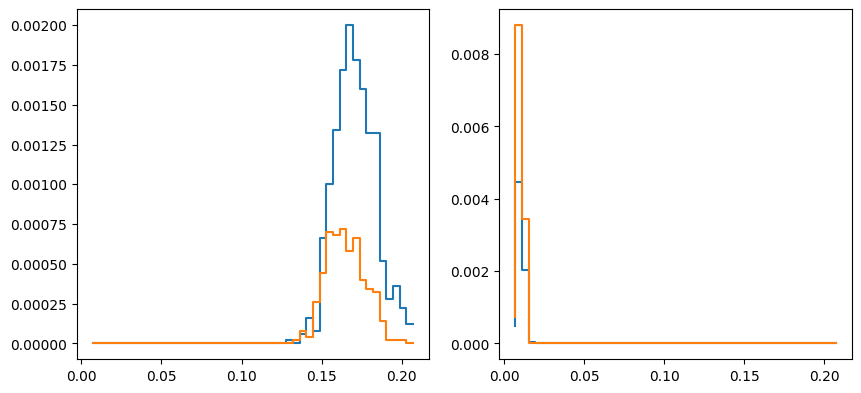

quantile: 0.012742749857031334


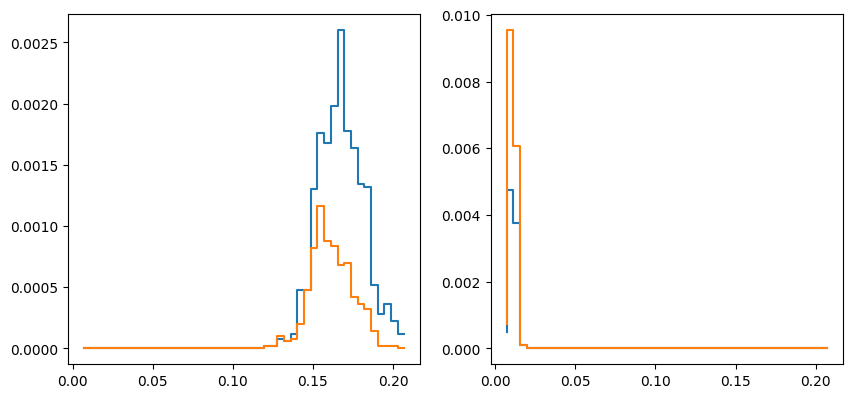

quantile: 0.016237767391887217


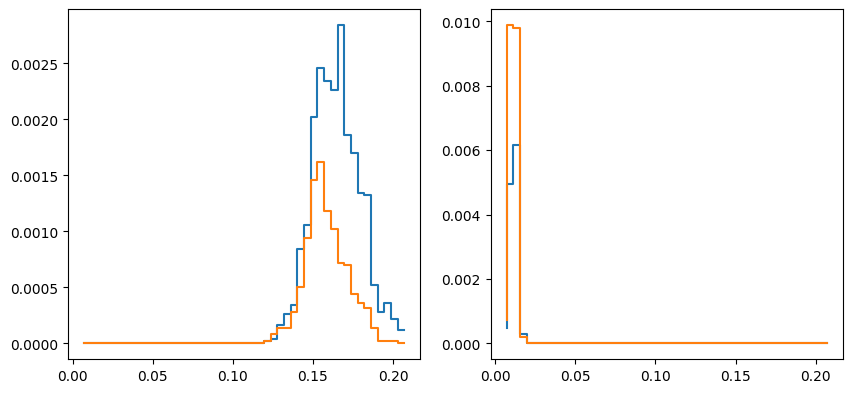

quantile: 0.0206913808111479


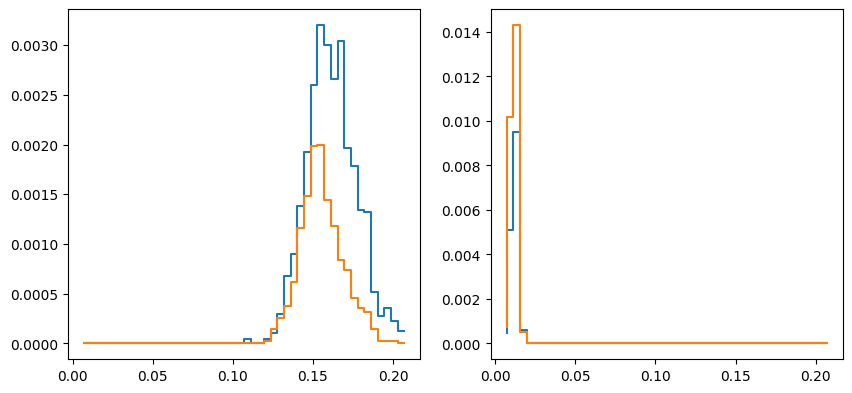

quantile: 0.026366508987303583


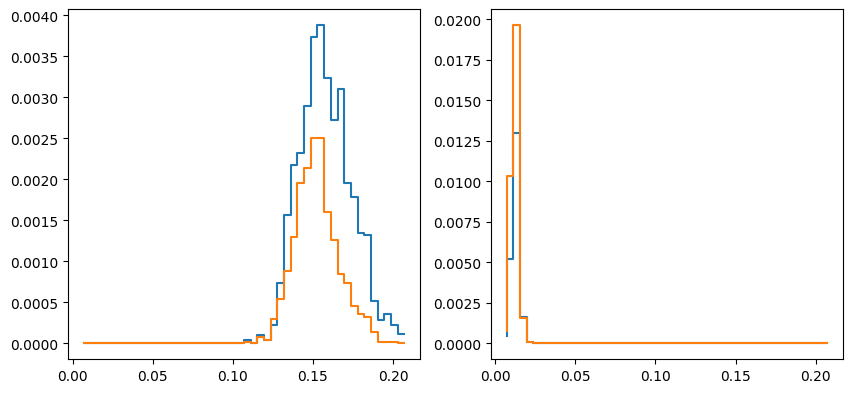

quantile: 0.03359818286283781


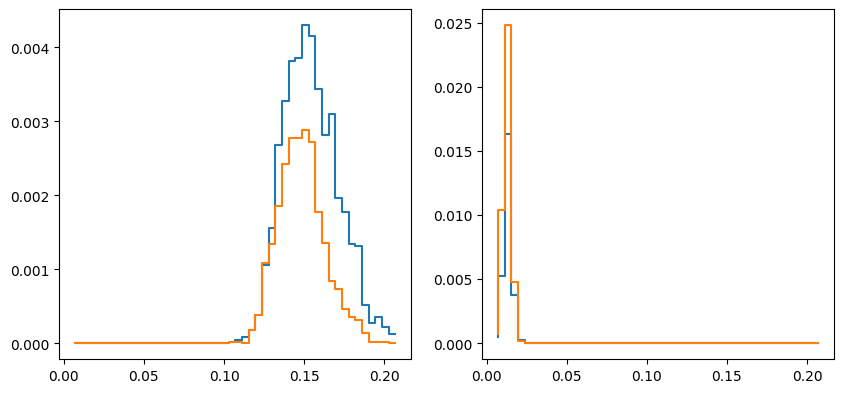

quantile: 0.04281332398719394


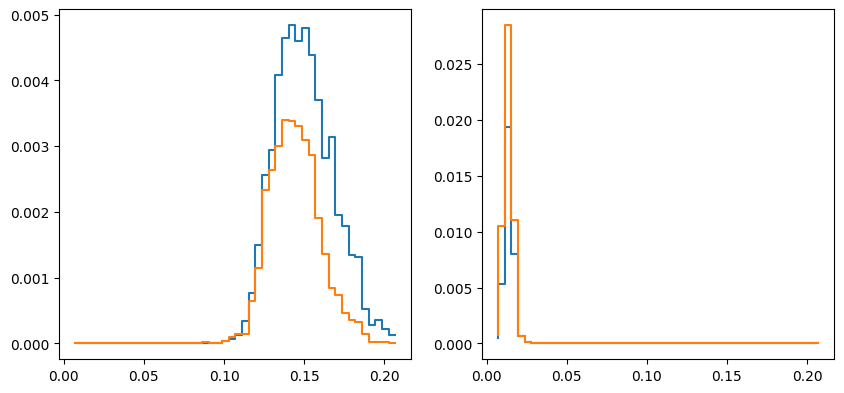

quantile: 0.0545559478116852


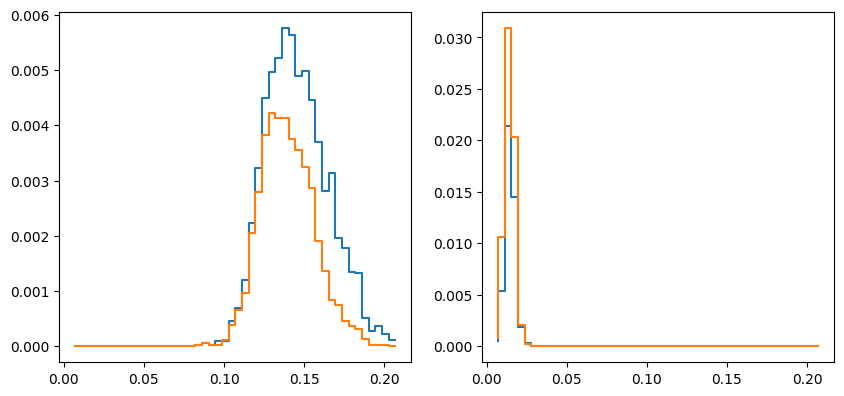

quantile: 0.06951927961775606


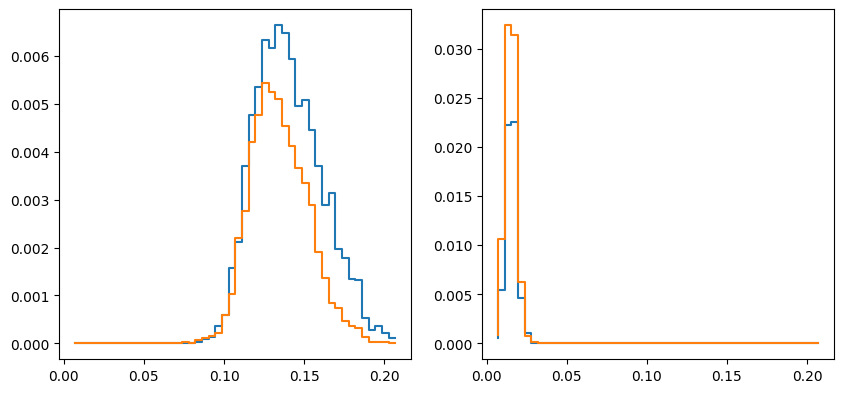

quantile: 0.08858667904100823


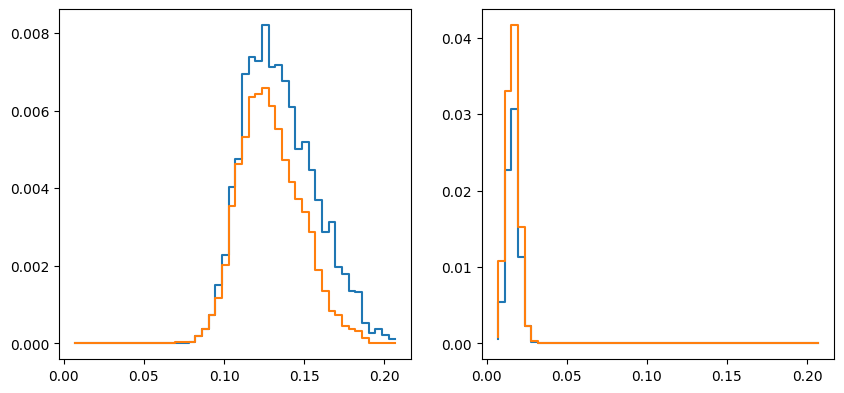

quantile: 0.11288378916846889


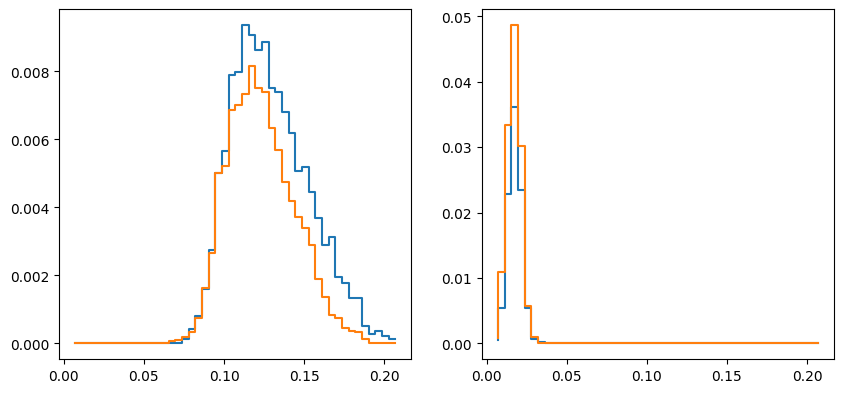

quantile: 0.14384498882876628


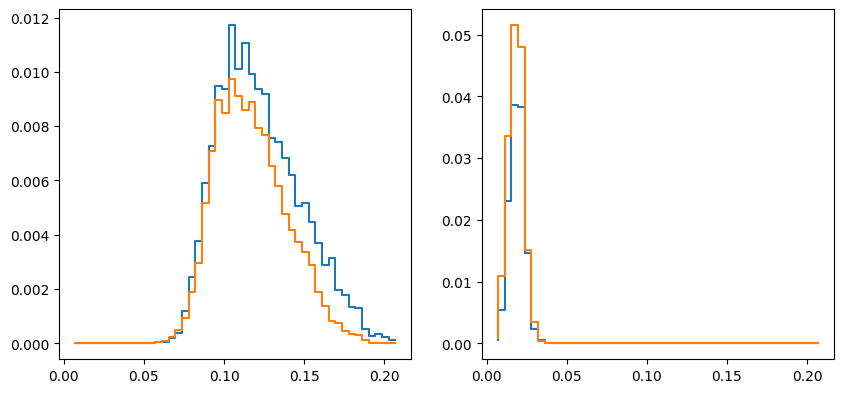

quantile: 0.18329807108324356


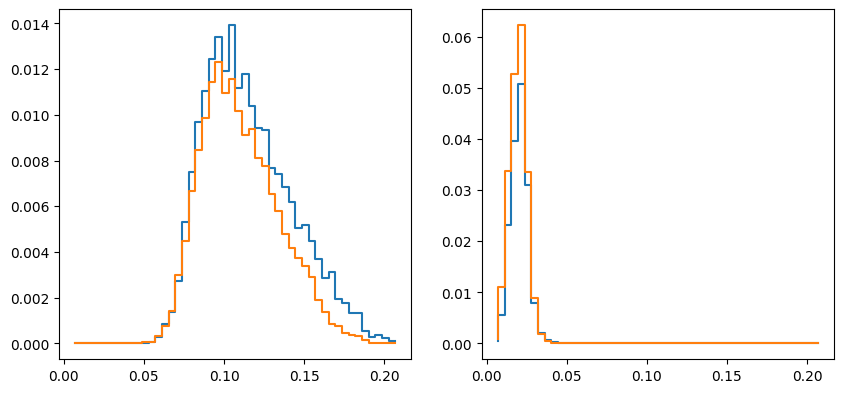

quantile: 0.23357214690901212


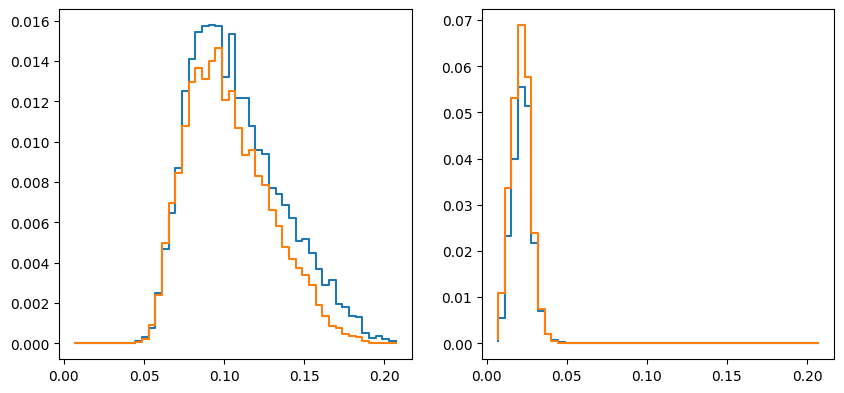

quantile: 0.29763514416313175


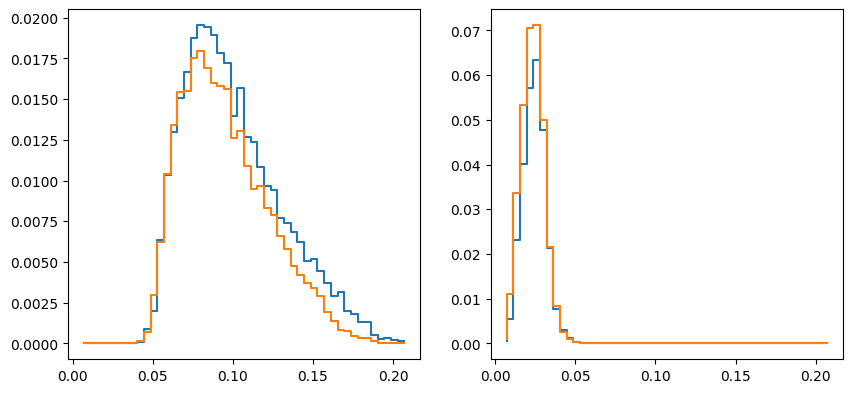

quantile: 0.37926901907322497


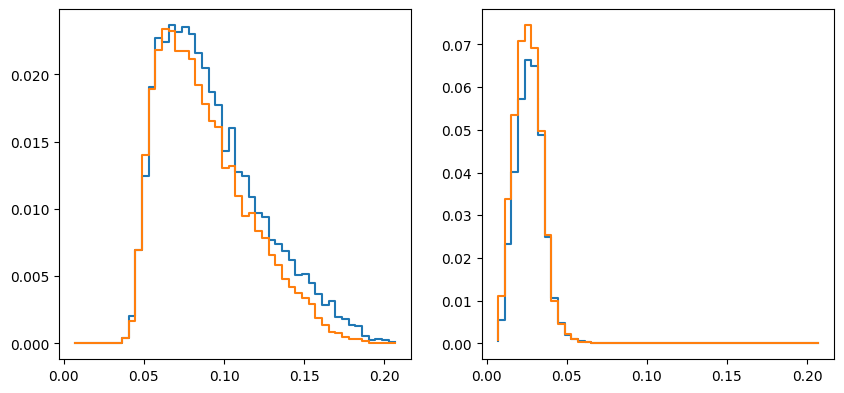

quantile: 0.4832930238571752


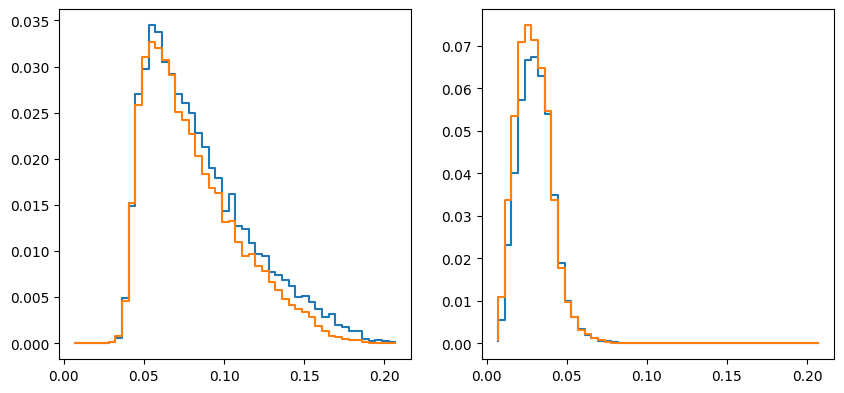

quantile: 0.615848211066026


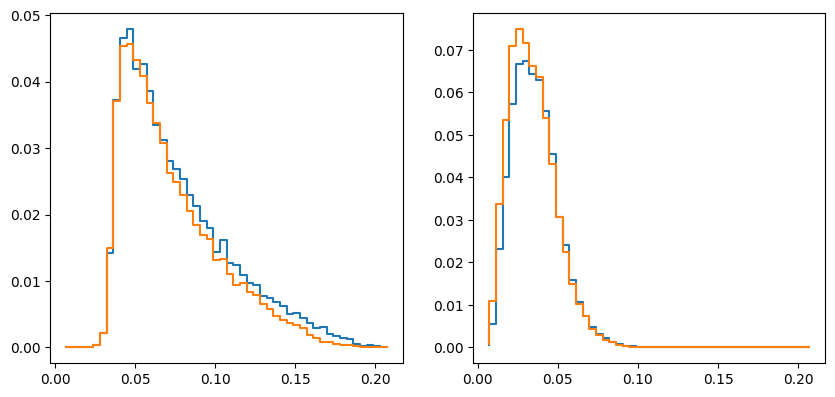

quantile: 0.7847599703514611


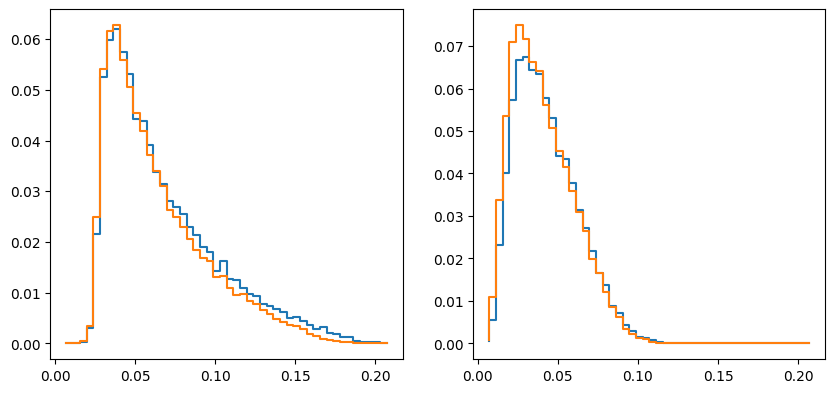

quantile: 1.0


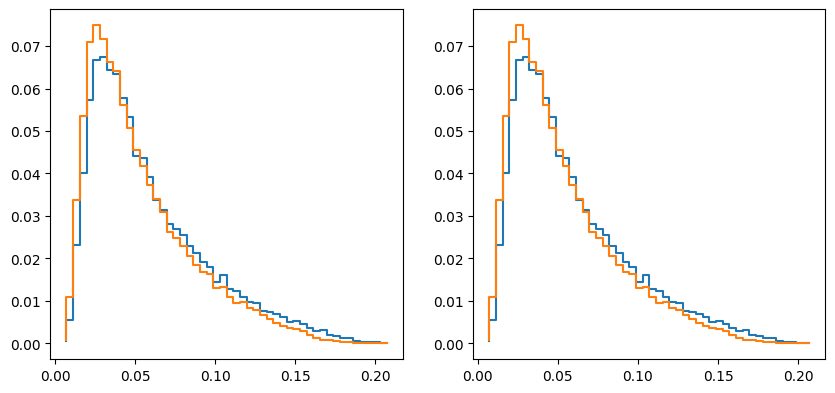

In [124]:
percentiles = np.logspace(-2,0,20)

chi2_0_1_low_shifted = []
chi2_0_1_up_shifted = []
bins_array = []
bins_array_low = []
bins_array_up = []

bins = np.linspace(min(mjj), max(mjj), 50)



for quantile in percentiles:

    lower_threshold = np.quantile(weight, quantile)
    upper_threshold = np.quantile(weight, 1-quantile)

    print(f'quantile: {quantile}')

    mjj_0 = mjj[label==0]
    mjj_1 = mjj[label==1]

    w_0 = weight[label==0]
    w_1 = weight[label==1]

    scale_0 = len(w_0)
    scale_1 = len(w_1)
    

    m_0_lower = mjj_0[ w_0 < lower_threshold]
    m_1_lower = mjj_1[ w_1 < lower_threshold]

    m_0_upper = mjj_0[ w_0 > upper_threshold]
    m_1_upper = mjj_1[ w_1 > upper_threshold]

    hist_0_lower,_ = np.histogram(m_0_lower, bins=bins)
    hist_1_lower,_ = np.histogram(m_1_lower, bins=bins)

    hist_0_upper,_ = np.histogram(m_0_upper, bins=bins)
    hist_1_upper,_ = np.histogram(m_1_upper, bins=bins)

    hist_0_err_l = np.sqrt(hist_0_lower)
    hist_1_err_l = np.sqrt(hist_1_lower)

    #hist_0_scale_l = np.sum(hist_0_lower)
    #hist_1_scale_l = np.sum(hist_1_lower)

    hist_0_err_u = np.sqrt(hist_0_upper)
    hist_1_err_u = np.sqrt(hist_1_upper)

  #  hist_0_scale_u = np.sum(hist_0_upper)
  #  hist_1_scale_u = np.sum(hist_1_upper)

    

    chi2_0_1_l = np.sum((hist_0_lower/scale_0 - hist_1_lower/scale_1)**2/(
                      ((hist_0_err_l/scale_0)**2 + (hist_1_err_l/scale_1)**2)
                      +10**(-80)))
    chi2_0_1_u = np.sum((hist_0_upper/scale_0 - hist_1_upper/scale_1)**2/(
                      ((hist_0_err_u/scale_0)**2 + (hist_1_err_u/scale_1)**2)
                      +10**(-80)))
    
    
    chi2_0_1_low_shifted.append(chi2_0_1_l)
    chi2_0_1_up_shifted.append(chi2_0_1_u)


    non_empty_bins_u = len(np.argwhere((hist_0_upper + hist_1_upper) > 0))
    non_empty_bins_l = len(np.argwhere((hist_0_lower + hist_1_lower) > 0))

    bins_array_low.append(non_empty_bins_l)
    bins_array_up.append(non_empty_bins_u)

    figure = plt.figure(figsize=(10,10))


    plt.subplot(2,2,1)
    plt.step(bin_0_lower[:-1], hist_0_lower/scale_0, label='weight')
    plt.step(bin_1_lower[:-1], hist_1_lower/scale_1, label='weight')
   # plt.show()
    #plt.hist(m_0_lower, bins=bins,histtype='step', label='weight', density=False)
    #plt.hist(m_1_lower, bins=bins,histtype='step', label='weight', density=False)
    #plt.yscale('log')

    plt.subplot(2,2,2)
    plt.step(bin_0_upper[:-1], hist_0_upper/scale_0, label='weight')
    plt.step(bin_1_upper[:-1], hist_1_upper/scale_1, label='weight')
    plt.show()


   # low_hist, _ = np.histogram(m_lower, bins=bins)
   # high_hist, _ = np.histogram(m_upper, bins=bins)



In [125]:
p_l_shifted = 1-chi2.cdf(np.array(chi2_0_1_low_shifted), np.array(bins_array_low)-1)
p_u_shifted = 1-chi2.cdf(np.array(chi2_0_1_up_shifted), np.array(bins_array_up)-1)

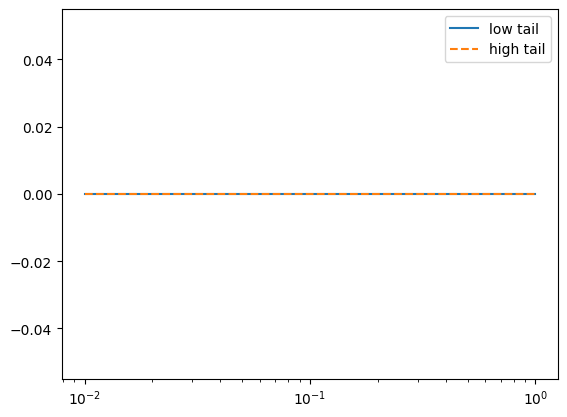

In [129]:
plt.plot(percentiles, p_l_shifted, label='low tail',linestyle='-')
plt.plot(percentiles, p_u_shifted, label='high tail', linestyle='--')
plt.legend()
#plt.yscale('log')
plt.xscale('log')
plt.show()

In [127]:
p_l_shifted

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

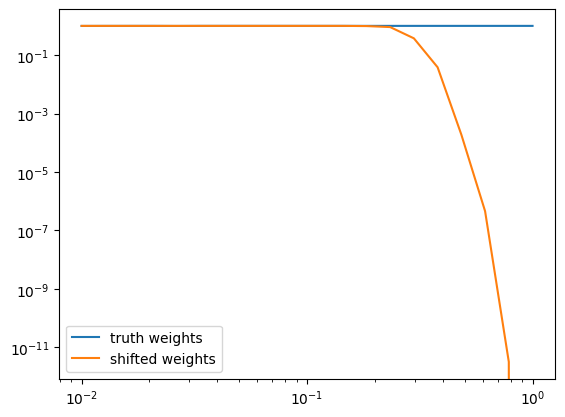

In [115]:
plt.plot(percentiles, p_u_truth, label='truth weights')
plt.plot(percentiles, p_u_shifted, label='shifted weights')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.show()